# Laboratoire 3 : Machines à vecteur de support et réseaux neuronaux
#### Département du génie logiciel et des technologies de l’information

| Étudiants             | Alexandre Bleau — BLEA14058906 / David Létinaud  — LETD05129708 / Thomas Lioret   — LIOT20069605|
|-----------------------|---------------------------------------------------------|
| Cours                 | GTI770 - Systèmes intelligents et apprentissage machine |
| Session               | Automne 2019                                            |
| Groupe                | 1                                                       |
| Numéro du laboratoire | 3                                                       |
| Professeur            | Prof. LOMBAERT                                          |
| Chargé de laboratoire | Pierre-Luc Delisle                                      |
| Date                  | 18/11/2019                                              |

## Introduction

Au cours de ce troisième laboratoire, nous allons étudier deux nouveaux algorithmes d'apprentissage supervisé pour résoudre le problème de classification des galaxies : les réseaux neuronaux et les machines à vecteurs de support (SVM). 
Nous allons également apprendre à utiliser la librairie tensorflow en association avec tensorboard pour pouvoir visualiser en temps réel l'évolution de l'apprentissage du réseau de neurones.
Dans un premier temps, nous allons concevoir un modèle de réseaux neuronaux basé sur le Multi-Layer Perceptron. Nous entrainerons ce modèle afin qu'il puisse classer les galaxies en "smooth" ou "spiral" en utilisant l'ensemble des primitives. Nous utiliserons le module keras de Google tensorflow.
Le deuxième modèle d'apprentissage s'appuie sur un modèle d'optimisation convexe dans le cas du SVM. Dans ce cas, nous n'utiliserons qu'une partie des primitives proposées qui seront couplées à nos primitives développées lors du premier laboratoire.

Nous étudierons notamment l'influence des hyperparamètres de ces deux méthodes afin de proposer le modèle le plus optimal dans le cas de notre problème de classification de galaxies. Nous verrons également l'impact de la taille du dataset sur les performances des modèles.

## Question 1

Dans le cas des réseaux neuronaux, l'utilisation d'une méthode de validation croisée prendrait beaucoup de temps. En effet, il faudrait répéter plusieurs tests avec un nombre "d'epochs" conséquent : ceci serait très chronophage. Nous avons donc décidé d'utiliser la méthode de validation hold-out avec 80% de données d'entrainement et 20% de test.

Concernant le modèle SVM, nous utilisons la méthode de cross validation avec 5 groupes de données (cv=5). Contrairement à Hold-out, la validation croisée effectue plusieurs cycles de validation pour réduire la variabilité. Ainsi, la validation croisée à l'avantage de combiner les mesures de l'aptitude à la prédiction pour obtenir une estimation plus précise de la performance de prédiction du modèle.


## Question 2

Nous normalisons nos données grâce à la méthode "normalize" de la librairie preprocessing. La normalisation se fait par rapport à la valeur maximale. Nous avons décidé de normaliser les primitives indépendamment les unes des autres (axis = 0). Par ailleurs, nous avons remarqué avec nos premiers tests que les performances étaient meilleures si l'on normalise par rapport à la valeur maximale (norm = 'max').

Cette fonction est utilisée dans la procédure "get_data()" dans functions.py de la manière suivante :

X = preprocessing.normalize(X, norm='max',axis = 0)

## Question 3

Nous allons d'abord utiliser un réseau neuronal de type "multilayer perceptron" (MLP).
Celui-ci se compose notamment d'une couche d'entrée, une de sortie et d'une ou plusieurs couches cachées. Ce type de réseau de neurones apprend à classifier par une succession de calculs matriciels qu'on appelle propagation et rétropropagation, ces 2 étapes constituent une epoch. 
Ce modèle possède plusieurs hyperparamètres notamment:
. Le nombre de couches cachées
. Le nombre de perceptrons sur les couches cachées
. Le nombre d'itérations (epochs)
. Le taux d'apprentissage (learning rate)
"Dropout" est également un paramètre important. En effet, celui-ci permet de réduire le surapprentissage d'un réseau neuronal en supprimant temporairement des neurones pendant l'entrainement pour être ensuite réactivé dans la phase de test. Dans notre cas, ce paramètre sera fixé à 0.5 pour les couches cachées. C'est-à-dire qu'on laisse une probabilité de 0.5 de retenir la sortie de chaque noeud.

En machine learning, la fonction coût d'un réseau neuronal mesure la "distance" entre la valeur prédite et la valeur réelle. Ici, la fonction de coût que nous avons choisie est "Binary Cross-Entropy Loss". En effet, nous avons choisi cette fonction, car nos valeurs cibles sont binaires, soit "smooth" ou "spiral".


La principale contrainte du modèle MLP est de trouver un compromis entre le temps d'apprentissage et la précision. La première architecture proposée par l'énoncé est de trois couches cachées : 100, 100, 2 (nombre de perceptrons), 60 epochs et un learning rate de 0.0005. Nous avons étudié différents cas avec 60 epochs :  
1 - l'influence du nombre de perceptrons avec un nombre de couches fixé.  
2 - l'influence du nombre de couches avec le même nombre de perceptrons par couche.  
3 - l'influence du learning rate.

Pour la méthode MLP, les algorithmes ont été executés sur un ordinateur avec les caractéristiques suivantes :

Memoire : 8 Go 1600 MHz DDR3  
Processor : 2,6 GHz Intel Core i5   
Graphics : Intel Iris 1536 Mo    

In [1]:
# Initialisation
from RN_model import *
from functions import get_data , plot_perf, plot_delay
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard # Pour affichage sur tensorboard
import shutil

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# Import and normalize data
X_train, X_test, Y_train, Y_test = get_data()

In [3]:
# Initialisations
layer_sizes = [100, 100, 2]
epochs = 60
learning_rate = 0.0005
batch_size = 100

dropout = 0.5

# Pour affichage
sub_title = ['loss','acc','f1','val_loss','val_acc', 'val_f1']
x_lab = "epochs"

Voici donc nos résultats avec différentes structures de réseaux de neurones :

1 - Influence du nombre de perceptrons: 

In [9]:
training_delay_RN = []
predicting_delay_RN = []
history_obj = []

best_accuracy_RN = 0

nb_perceptrons_range = [[5, 4, 4],[100, 100, 2],[500, 500, 500]]                                                                                                                      

# Suppression de la dernière étude d'hyperparamètre
try:
    tf.reset_default_graph()
    shutil.rmtree('./logs')
except:
    print("nothing to delete")
    
# Callbacks pour affichage des performances dans tensorflow : 1 callback pour chaque hyperparamètre
tensorboard_callback = []
for i in range(3):
    tensorboard_callback.append(TensorBoard(log_dir="logs\{}".format(i)))
# Par invité de commande : 
# tensorboard --logdir="./logs" --port 6006
cpt = 0
for nb_perceptrons in nb_perceptrons_range:                                                                                                                                                  
    model = RN_model(nb_perceptrons, dropout, learning_rate)                                                                                                                              
    #### Apprentissage                                                                                                                                                             
    start = time.time()                                                                                                                                                            
    hist_obj = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data=(X_test, Y_test), callbacks = [tensorboard_callback[cpt]])                                                             

    end = time.time()                                                                                                                                                              
    training_delay_RN.append(end - start)                                                                                                                                          

    history_obj.append( list(hist_obj.history.values()))

    #### Prédiction                                                                                                                                                                
    start = time.time()                                                                                                                                                            

    Y_pred = np.where(model.predict(X_test) > 0.5, 1, 0)                                                                                                                           

    end = time.time()                                                                                                                                                              
    predicting_delay_RN.append(end - start)    
    cpt+=1   

nothing to delete
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 12800 samples, validate on 3200 samples
Epoch 1/60
12800/12800 [==============================] - 2s 181us/sample - loss: 0.6938 - acc: 0.5214 - f1: 0.6650 - val_loss: 0.6923 - val_acc: 0.5203 - val_f1: 0.6832
Epoch 2/60
12800/12800 [==============================] - 1s 55us/sample - loss: 0.6826 - acc: 0.5452 - f1: 0.6795 - val_loss: 0.6775 - val_acc: 0.5344 - val_f1: 0.6890
Epoch 3/60
12800/12800 [==============================] - 1s 53us/sample - loss: 0.6546 - acc: 0.5924 - f1: 0.7021 - val_loss: 0.5886 - val_acc: 0.8775 - val_f1: 0.8851
Epoch 4/60
12800/12800 [==============================] - 1s 53us/sample - loss: 0.6283 - acc: 0.5998 - f1: 0.7032 - val_loss: 0.5254 - val_acc: 0.8809 - val_f1: 0.8841
Epoch 5/60
12800/12800 [====================

Epoch 32/60
12800/12800 [==============================] - 2s 160us/sample - loss: 0.3886 - acc: 0.8421 - f1: 0.8633 - val_loss: 0.2295 - val_acc: 0.9463 - val_f1: 0.9466
Epoch 33/60
12800/12800 [==============================] - 1s 107us/sample - loss: 0.3921 - acc: 0.8413 - f1: 0.8630 - val_loss: 0.2191 - val_acc: 0.9513 - val_f1: 0.9538
Epoch 34/60
12800/12800 [==============================] - 1s 117us/sample - loss: 0.3839 - acc: 0.8436 - f1: 0.8655 - val_loss: 0.2236 - val_acc: 0.9528 - val_f1: 0.9547
Epoch 35/60
12800/12800 [==============================] - 2s 126us/sample - loss: 0.3848 - acc: 0.8436 - f1: 0.8651 - val_loss: 0.2282 - val_acc: 0.9478 - val_f1: 0.9504
Epoch 36/60
12800/12800 [==============================] - 2s 130us/sample - loss: 0.3832 - acc: 0.8468 - f1: 0.8676 - val_loss: 0.2195 - val_acc: 0.9506 - val_f1: 0.9529
Epoch 37/60
12800/12800 [==============================] - 2s 123us/sample - loss: 0.3828 - acc: 0.8459 - f1: 0.8664 - val_loss: 0.2314 - val_acc

Epoch 20/60
12800/12800 [==============================] - 6s 457us/sample - loss: 0.1131 - acc: 0.9577 - f1: 0.9590 - val_loss: 0.1139 - val_acc: 0.9588 - val_f1: 0.9601
Epoch 21/60
12800/12800 [==============================] - 5s 409us/sample - loss: 0.1135 - acc: 0.9567 - f1: 0.9581 - val_loss: 0.1137 - val_acc: 0.9569 - val_f1: 0.9575
Epoch 22/60
12800/12800 [==============================] - 5s 365us/sample - loss: 0.1072 - acc: 0.9596 - f1: 0.9609 - val_loss: 0.1146 - val_acc: 0.9553 - val_f1: 0.9568
Epoch 23/60
12800/12800 [==============================] - 5s 400us/sample - loss: 0.1069 - acc: 0.9600 - f1: 0.9612 - val_loss: 0.1180 - val_acc: 0.9581 - val_f1: 0.9600
Epoch 24/60
12800/12800 [==============================] - 4s 315us/sample - loss: 0.1070 - acc: 0.9593 - f1: 0.9607 - val_loss: 0.1213 - val_acc: 0.9550 - val_f1: 0.9578
Epoch 25/60
12800/12800 [==============================] - 4s 319us/sample - loss: 0.1086 - acc: 0.9594 - f1: 0.9607 - val_loss: 0.1260 - val_acc

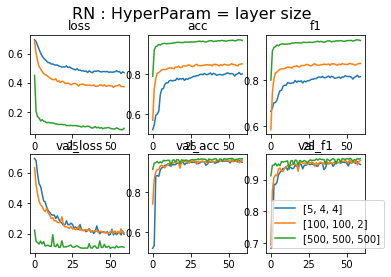

In [10]:
# Mise en forme des données pour l'affichage
ho = np.array(history_obj)
ho = ho.transpose(1,2,0)

leg = [str(i) for i in nb_perceptrons_range]                                                                                                                                          

titre = "RN : HyperParam = layer size"   

plot_perf(ho, leg, titre ,sub_title)

Nous remarquons qu'avec trois couches, les performances d'accuracy et de f1_score sont meilleurs dans le cas de [500,500,500] (dépassant les 95%). On remarque également que la perte ("loss") est, en quelque sorte, inversement proportionnelle aux f1_score et accuracy dans ce cas. C'est à dire que pour un f1_score et une accuracy plus faible (nombre de perceptrons inférieur) la valeur de perte sera plus importante que les architectures avec plus de perceptrons.


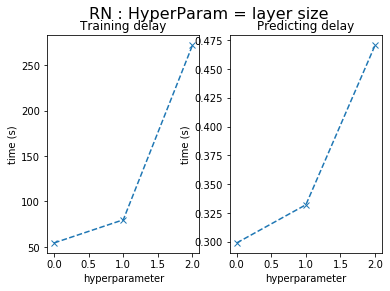

In [11]:
plot_delay(training_delay_RN,predicting_delay_RN,titre)

En revanche, ajouter un nombre de perceptrons par couche important influence grandement le temps d'entrainement et de prédiction.


2 : Influence du nombre de couches :

In [12]:
training_delay_RN = []
predicting_delay_RN = []
history_obj = []
cpt = 0
best_accuracy_RN = 0

layer_sizes_range = [[100],[100, 100, 2],[100, 100, 100, 100, 100, 2]]

# Suppression de la dernière étude d'hyperparamètre
try:
    tf.reset_default_graph()
    shutil.rmtree('./logs')
except:
    print("nothing to delete")

# Callbacks pour affichage des performances dans tensorflow : 1 callback pour chaque hyperparamètre
tensorboard_callback = []
for i in range(3):
    tensorboard_callback.append(TensorBoard(log_dir="logs\{}".format(i)))
# Par invité de commande : 
# tensorboard --logdir="./logs" --port 6006
cpt = 0
for layer_s in layer_sizes_range:
    model = RN_model(layer_s, dropout, learning_rate)
    #### Apprentissage                                                                                                                                                               
    start = time.time()                                                                                                                   
    hist_obj = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data=(X_test, Y_test), callbacks = [tensorboard_callback[cpt]]) 

    end = time.time()
    training_delay_RN.append(end - start)

    history_obj.append( list(hist_obj.history.values()))

    #### Prédiction                                                                                                                                                                  
    start = time.time()

    Y_pred = np.where(model.predict(X_test) > 0.5, 1, 0)

    end = time.time()
    predicting_delay_RN.append(end - start)
    cpt+=1

nothing to delete
Train on 12800 samples, validate on 3200 samples
Epoch 1/60
12800/12800 [==============================] - 2s 138us/sample - loss: 0.6292 - acc: 0.6778 - f1: 0.6957 - val_loss: 0.5179 - val_acc: 0.8200 - val_f1: 0.8215
Epoch 2/60
12800/12800 [==============================] - 1s 57us/sample - loss: 0.4356 - acc: 0.8280 - f1: 0.8329 - val_loss: 0.3649 - val_acc: 0.8497 - val_f1: 0.8478
Epoch 3/60
12800/12800 [==============================] - 1s 58us/sample - loss: 0.3332 - acc: 0.8703 - f1: 0.8735 - val_loss: 0.2828 - val_acc: 0.8956 - val_f1: 0.8997
Epoch 4/60
12800/12800 [==============================] - 1s 56us/sample - loss: 0.2703 - acc: 0.8998 - f1: 0.9027 - val_loss: 0.2299 - val_acc: 0.9162 - val_f1: 0.9186
Epoch 5/60
12800/12800 [==============================] - 1s 56us/sample - loss: 0.2309 - acc: 0.9173 - f1: 0.9197 - val_loss: 0.1995 - val_acc: 0.9234 - val_f1: 0.9260
Epoch 6/60
12800/12800 [==============================] - 1s 56us/sample - loss: 0.2030

Epoch 49/60
12800/12800 [==============================] - 1s 56us/sample - loss: 0.1127 - acc: 0.9591 - f1: 0.9606 - val_loss: 0.1027 - val_acc: 0.9603 - val_f1: 0.9615
Epoch 50/60
12800/12800 [==============================] - 1s 56us/sample - loss: 0.1137 - acc: 0.9602 - f1: 0.9612 - val_loss: 0.1036 - val_acc: 0.9597 - val_f1: 0.9611
Epoch 51/60
12800/12800 [==============================] - 1s 55us/sample - loss: 0.1082 - acc: 0.9609 - f1: 0.9620 - val_loss: 0.1102 - val_acc: 0.9547 - val_f1: 0.9550
Epoch 52/60
12800/12800 [==============================] - 1s 55us/sample - loss: 0.1122 - acc: 0.9593 - f1: 0.9604 - val_loss: 0.1102 - val_acc: 0.9563 - val_f1: 0.9567
Epoch 53/60
12800/12800 [==============================] - 1s 63us/sample - loss: 0.1115 - acc: 0.9580 - f1: 0.9590 - val_loss: 0.1190 - val_acc: 0.9544 - val_f1: 0.9546
Epoch 54/60
12800/12800 [==============================] - 1s 59us/sample - loss: 0.1108 - acc: 0.9606 - f1: 0.9620 - val_loss: 0.1022 - val_acc: 0.96

Epoch 37/60
12800/12800 [==============================] - 1s 86us/sample - loss: 0.4105 - acc: 0.7344 - f1: 0.7905 - val_loss: 0.1642 - val_acc: 0.9550 - val_f1: 0.9551
Epoch 38/60
12800/12800 [==============================] - 1s 86us/sample - loss: 0.4069 - acc: 0.7370 - f1: 0.7931 - val_loss: 0.1586 - val_acc: 0.9553 - val_f1: 0.9553
Epoch 39/60
12800/12800 [==============================] - 1s 92us/sample - loss: 0.4133 - acc: 0.7320 - f1: 0.7900 - val_loss: 0.1588 - val_acc: 0.9550 - val_f1: 0.9580
Epoch 40/60
12800/12800 [==============================] - 1s 88us/sample - loss: 0.4054 - acc: 0.7406 - f1: 0.7959 - val_loss: 0.1537 - val_acc: 0.9600 - val_f1: 0.9606
Epoch 41/60
12800/12800 [==============================] - 1s 86us/sample - loss: 0.4045 - acc: 0.7379 - f1: 0.7929 - val_loss: 0.1492 - val_acc: 0.9588 - val_f1: 0.9599
Epoch 42/60
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3998 - acc: 0.7427 - f1: 0.7969 - val_loss: 0.1483 - val_acc: 0.95

Epoch 25/60
12800/12800 [==============================] - 2s 159us/sample - loss: 0.3980 - acc: 0.8391 - f1: 0.8612 - val_loss: 0.2473 - val_acc: 0.9475 - val_f1: 0.9485
Epoch 26/60
12800/12800 [==============================] - 2s 168us/sample - loss: 0.4030 - acc: 0.8356 - f1: 0.8586 - val_loss: 0.2448 - val_acc: 0.9484 - val_f1: 0.9504
Epoch 27/60
12800/12800 [==============================] - 2s 157us/sample - loss: 0.4026 - acc: 0.8371 - f1: 0.8600 - val_loss: 0.2504 - val_acc: 0.9459 - val_f1: 0.9489
Epoch 28/60
12800/12800 [==============================] - 2s 158us/sample - loss: 0.4048 - acc: 0.8357 - f1: 0.8584 - val_loss: 0.2497 - val_acc: 0.9478 - val_f1: 0.9504
Epoch 29/60
12800/12800 [==============================] - 2s 158us/sample - loss: 0.4024 - acc: 0.8342 - f1: 0.8582 - val_loss: 0.2395 - val_acc: 0.9509 - val_f1: 0.9535
Epoch 30/60
12800/12800 [==============================] - 2s 157us/sample - loss: 0.4032 - acc: 0.8339 - f1: 0.8578 - val_loss: 0.2405 - val_acc

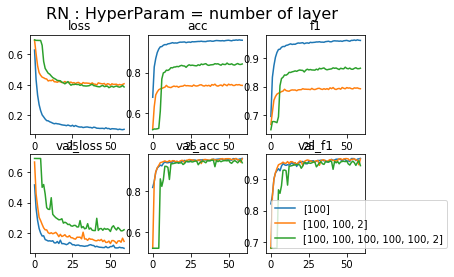

In [13]:
# Mise en forme des données pour l'affichage
ho = np.array(history_obj)
ho = ho.transpose(1,2,0)

leg = [str(i) for i in layer_sizes_range]                                                                                                                                              

titre = "RN : HyperParam = number of layer"                                                                                                                                         

plot_perf(ho, leg, titre ,sub_title)

Dans notre problème de classification de galaxies, on note que le les valeurs des accuracy et des f1_scores tendent vers les mêmes performances sur les jeux de données de tests qu'il y ait une, trois ou six couches (nb de perceptrons constant par couche). On remarque également que la valeur de perte est moins importante dans le cas où il y le moins de couche. 


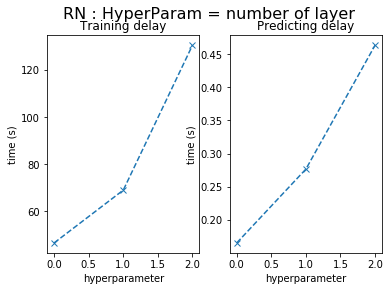

In [14]:
plot_delay(training_delay_RN,predicting_delay_RN,titre)

Ici, nous remarquons que : plus le nombre de couche est important plus le temps d'entrainement et de prediction sont élevés.

3 - Influence du taux d'apprentissage:

In [15]:
################################## Learning rate                                                                                                                                     
training_delay_RN = []
predicting_delay_RN = []
history_obj = []
cpt = 0
best_accuracy_RN = 0

l_rate_range = [0.00001,0.0005,0.01]

# Suppression de la dernière étude d'hyperparamètre
try:
    tf.reset_default_graph()
    shutil.rmtree('./logs')
except:
    print("nothing to delete")

# Callbacks pour affichage des performances dans tensorflow : 1 callback pour chaque hyperparamètre
tensorboard_callback = []
for i in range(3):
    tensorboard_callback.append(TensorBoard(log_dir="logs\{}".format(i)))#time.time())))
# Par invité de commande : 
# tensorboard --logdir="./logs" --port 6006
cpt = 0
for l_rate in l_rate_range:
    model = RN_model(layer_sizes, dropout, l_rate)
    #### Apprentissage
    start = time.time()
    #model.fit(X_train, Y_train, batch_size = 100, epochs = 60)
    hist_obj = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data=(X_test, Y_test), callbacks = [tensorboard_callback[cpt]])
    end = time.time()
    training_delay_RN.append(end - start)

    history_obj.append( list(hist_obj.history.values()))

    #### Prédiction
    start = time.time()

    Y_pred = np.where(model.predict(X_test) > 0.5, 1, 0)

    end = time.time()
    predicting_delay_RN.append(end - start)
    cpt+=1

nothing to delete
Train on 12800 samples, validate on 3200 samples
Epoch 1/60
12800/12800 [==============================] - 3s 252us/sample - loss: 0.7097 - acc: 0.5020 - f1: 0.5683 - val_loss: 0.6926 - val_acc: 0.5169 - val_f1: 0.6784
Epoch 2/60
12800/12800 [==============================] - 1s 87us/sample - loss: 0.7031 - acc: 0.5091 - f1: 0.6160 - val_loss: 0.6917 - val_acc: 0.5181 - val_f1: 0.6770
Epoch 3/60
12800/12800 [==============================] - 1s 87us/sample - loss: 0.7009 - acc: 0.5114 - f1: 0.6205 - val_loss: 0.6913 - val_acc: 0.5200 - val_f1: 0.6776
Epoch 4/60
12800/12800 [==============================] - 1s 93us/sample - loss: 0.6985 - acc: 0.5138 - f1: 0.6245 - val_loss: 0.6918 - val_acc: 0.5194 - val_f1: 0.6802
Epoch 5/60
12800/12800 [==============================] - 1s 92us/sample - loss: 0.6967 - acc: 0.5197 - f1: 0.6316 - val_loss: 0.6925 - val_acc: 0.5184 - val_f1: 0.6793
Epoch 6/60
12800/12800 [==============================] - 1s 91us/sample - loss: 0.6950

Epoch 49/60
12800/12800 [==============================] - 2s 120us/sample - loss: 0.6182 - acc: 0.6277 - f1: 0.6935 - val_loss: 0.5794 - val_acc: 0.8453 - val_f1: 0.8485
Epoch 50/60
12800/12800 [==============================] - 2s 130us/sample - loss: 0.6174 - acc: 0.6282 - f1: 0.6932 - val_loss: 0.5757 - val_acc: 0.8484 - val_f1: 0.8542
Epoch 51/60
12800/12800 [==============================] - 2s 144us/sample - loss: 0.6159 - acc: 0.6305 - f1: 0.6984 - val_loss: 0.5720 - val_acc: 0.8487 - val_f1: 0.8529
Epoch 52/60
12800/12800 [==============================] - 1s 101us/sample - loss: 0.6115 - acc: 0.6327 - f1: 0.6972 - val_loss: 0.5682 - val_acc: 0.8516 - val_f1: 0.8567
Epoch 53/60
12800/12800 [==============================] - 1s 87us/sample - loss: 0.6083 - acc: 0.6322 - f1: 0.6997 - val_loss: 0.5644 - val_acc: 0.8519 - val_f1: 0.8565
Epoch 54/60
12800/12800 [==============================] - 1s 87us/sample - loss: 0.6030 - acc: 0.6395 - f1: 0.7037 - val_loss: 0.5598 - val_acc: 

Epoch 37/60
12800/12800 [==============================] - 1s 88us/sample - loss: 0.3884 - acc: 0.8359 - f1: 0.8152 - val_loss: 0.2177 - val_acc: 0.9572 - val_f1: 0.9586
Epoch 38/60
12800/12800 [==============================] - 1s 96us/sample - loss: 0.3859 - acc: 0.8395 - f1: 0.8207 - val_loss: 0.2321 - val_acc: 0.9513 - val_f1: 0.9517
Epoch 39/60
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3935 - acc: 0.8321 - f1: 0.8121 - val_loss: 0.2537 - val_acc: 0.9353 - val_f1: 0.9337
Epoch 40/60
12800/12800 [==============================] - 1s 83us/sample - loss: 0.3907 - acc: 0.8337 - f1: 0.8139 - val_loss: 0.2765 - val_acc: 0.9194 - val_f1: 0.9166
Epoch 41/60
12800/12800 [==============================] - 1s 83us/sample - loss: 0.3973 - acc: 0.8302 - f1: 0.8096 - val_loss: 0.2178 - val_acc: 0.9588 - val_f1: 0.9600
Epoch 42/60
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3870 - acc: 0.8345 - f1: 0.8152 - val_loss: 0.2199 - val_acc: 0.95

Epoch 25/60
12800/12800 [==============================] - 1s 88us/sample - loss: 0.6925 - acc: 0.5192 - f1: 0.6817 - val_loss: 0.6931 - val_acc: 0.5191 - val_f1: 0.6825
Epoch 26/60
12800/12800 [==============================] - 1s 93us/sample - loss: 0.6927 - acc: 0.5192 - f1: 0.6821 - val_loss: 0.6925 - val_acc: 0.5191 - val_f1: 0.6809
Epoch 27/60
12800/12800 [==============================] - 1s 97us/sample - loss: 0.6925 - acc: 0.5192 - f1: 0.6822 - val_loss: 0.6925 - val_acc: 0.5191 - val_f1: 0.6825
Epoch 28/60
12800/12800 [==============================] - 2s 146us/sample - loss: 0.6925 - acc: 0.5192 - f1: 0.6822 - val_loss: 0.6925 - val_acc: 0.5191 - val_f1: 0.6819
Epoch 29/60
12800/12800 [==============================] - 1s 110us/sample - loss: 0.6927 - acc: 0.5136 - f1: 0.6539 - val_loss: 0.6925 - val_acc: 0.5191 - val_f1: 0.6816
Epoch 30/60
12800/12800 [==============================] - 1s 99us/sample - loss: 0.6925 - acc: 0.5192 - f1: 0.6821 - val_loss: 0.6925 - val_acc: 0.

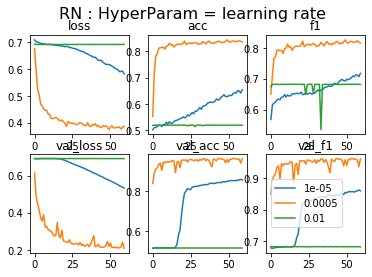

In [16]:
# Traitement pour affichage
ho = np.array(history_obj)
ho = ho.transpose(1,2,0)
                                                                                                                                      
leg = [str(i) for i in l_rate_range]                                                                                                                                                
                                                                                                                                    
titre = "RN : HyperParam = learning rate"                                                                                                                                           

plot_perf(ho, leg, titre ,sub_title)

Ici nous étudions l'influence du learning rate. Nous remarquons que nous devons trouver un compromis dans la valeur du learning rate pour avoir une étude dont les performances sont bonnes. Il semble que la valeur de learning rate qui optimise ces résultats se trouve à 0.0005. 

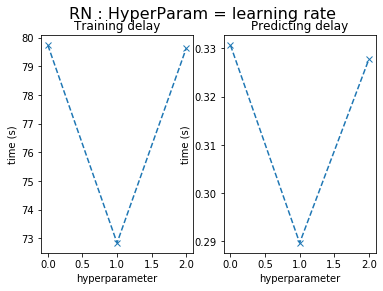

In [17]:
plot_delay(training_delay_RN,predicting_delay_RN,titre)

Nous remarquons ici que c'est la valeur de 0.0005 qui nous apporte les meilleurs performances en terme de temps bien que l'ordre de grandeur est similaire (70sec-80sec), ce qui constitue donc le meilleur compromis.

La fonction de coût que nous avons choisie est "Binary Cross-Entropy Loss". En effet, nous avons choisi cette fonction car nos valeurs cibles sont 0 ou 1, soit "smooth" ou "spiral".

## Question 4


Ici, nous allons faire varier le nombre d'epochs. Nous allons notament visualiser le phénomène de surapprentissage en paramétrant un nombre d'epochs très grand.

In [4]:
training_delay_RN = []
predicting_delay_RN = []
history_obj = []
cpt = 0
best_accuracy_RN = 0

epochs_range = [30,60, 2500]                                                                                                                                            
max_ep = max(epochs_range) 

# Suppression de la dernière étude d'hyperparamètre
try:
    tf.reset_default_graph()
    shutil.rmtree('./logs')
except:
    print("nothing to delete")
    
# Callbacks pour affichage des performances dans tensorflow : 1 callback pour chaque hyperparamètre
tensorboard_callback = []
for i in range(3):
    tensorboard_callback.append(TensorBoard(log_dir="logs\{}".format(i)))
# Par invité de commande : 
# tensorboard --logdir="./logs" --port 6006
cpt = 0
for ep in epochs_range:                                                                                                                                                            
    model = RN_model(layer_sizes, dropout, learning_rate)                                                                                                                          
    #### Apprentissage                                                                                                                                                             
    start = time.time()                                                                                                                                                            
    #model.fit(X_train, Y_train, batch_size = 100, epochs = 60)                                                                                                                    
    hist_obj = model.fit(X_train, Y_train, batch_size = batch_size, epochs = ep, validation_data=(X_test, Y_test), callbacks = [tensorboard_callback[cpt]])                                                                  

    end = time.time()                                                                                                                                                              
    training_delay_RN.append(end - start)                                                                                                                                          

    ho_tmp = list(hist_obj.history.values())                                                                                                                                       
    ho_tmp = [i + [np.nan for _ in range(max_ep-ep)] for i in ho_tmp ]                                                                                                             
    history_obj.append(ho_tmp)
    #### Prédiction                                                                                                                                                                
    start = time.time()                                                                                                                                                            

    Y_pred = np.where(model.predict(X_test) > 0.5, 1, 0)                                                                                                                           

    end = time.time()                                                                                                                                                              
    predicting_delay_RN.append(end - start) 
    cpt+=1

nothing to delete
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 12800 samples, validate on 3200 samples
Epoch 1/30
12800/12800 [==============================] - 3s 210us/sample - loss: 0.6808 - acc: 0.5435 - f1: 0.6792 - val_loss: 0.6233 - val_acc: 0.7494 - val_f1: 0.7995
Epoch 2/30
12800/12800 [==============================] - 1s 88us/sample - loss: 0.5877 - acc: 0.6403 - f1: 0.5676 - val_loss: 0.4439 - val_acc: 0.8709 - val_f1: 0.8698
Epoch 3/30
12800/12800 [==============================] - 1s 91us/sample - loss: 0.5042 - acc: 0.6789 - f1: 0.5919 - val_loss: 0.3517 - val_acc: 0.9034 - val_f1: 0.9106
Epoch 4/30
12800/12800 [==============================] - 2s 165us/sample - loss: 0.4738 - acc: 0.6937 - f1: 0.6112 - val_loss: 0.2870 - val_acc: 0.9253 - val_f1: 0.9285
Epoch 5/30
12800/12800 [===================

12800/12800 [==============================] - 1s 85us/sample - loss: 0.4258 - acc: 0.8277 - f1: 0.8526 - val_loss: 0.2902 - val_acc: 0.9413 - val_f1: 0.9442
Epoch 15/60
12800/12800 [==============================] - 1s 83us/sample - loss: 0.4155 - acc: 0.8321 - f1: 0.8552 - val_loss: 0.2896 - val_acc: 0.9406 - val_f1: 0.9441
Epoch 16/60
12800/12800 [==============================] - 1s 84us/sample - loss: 0.4151 - acc: 0.8318 - f1: 0.8549 - val_loss: 0.2914 - val_acc: 0.9369 - val_f1: 0.9390
Epoch 17/60
12800/12800 [==============================] - 1s 83us/sample - loss: 0.4107 - acc: 0.8338 - f1: 0.8570 - val_loss: 0.2722 - val_acc: 0.9469 - val_f1: 0.9494
Epoch 18/60
12800/12800 [==============================] - 1s 83us/sample - loss: 0.4027 - acc: 0.8395 - f1: 0.8614 - val_loss: 0.2649 - val_acc: 0.9463 - val_f1: 0.9486
Epoch 19/60
12800/12800 [==============================] - 1s 83us/sample - loss: 0.4158 - acc: 0.8305 - f1: 0.8552 - val_loss: 0.2820 - val_acc: 0.9353 - val_f1:

Epoch 2/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.6336 - acc: 0.6084 - f1: 0.6311 - val_loss: 0.5543 - val_acc: 0.8631 - val_f1: 0.8724
Epoch 3/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.5610 - acc: 0.7591 - f1: 0.7422 - val_loss: 0.4637 - val_acc: 0.9025 - val_f1: 0.9068
Epoch 4/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.5098 - acc: 0.7930 - f1: 0.7732 - val_loss: 0.4047 - val_acc: 0.9156 - val_f1: 0.9197
Epoch 5/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.4840 - acc: 0.8080 - f1: 0.7867 - val_loss: 0.3879 - val_acc: 0.9253 - val_f1: 0.9258
Epoch 6/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.4648 - acc: 0.8150 - f1: 0.7939 - val_loss: 0.3615 - val_acc: 0.9366 - val_f1: 0.9379
Epoch 7/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.4546 - acc: 0.8149 - f1: 0.7923 - val_loss: 0.3646 - val_acc

Epoch 50/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3856 - acc: 0.8346 - f1: 0.8142 - val_loss: 0.2426 - val_acc: 0.9434 - val_f1: 0.9415
Epoch 51/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3774 - acc: 0.8409 - f1: 0.8225 - val_loss: 0.2917 - val_acc: 0.9034 - val_f1: 0.8968
Epoch 52/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3867 - acc: 0.8340 - f1: 0.8140 - val_loss: 0.2246 - val_acc: 0.9506 - val_f1: 0.9502
Epoch 53/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3823 - acc: 0.8366 - f1: 0.8162 - val_loss: 0.2250 - val_acc: 0.9488 - val_f1: 0.9481
Epoch 54/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3861 - acc: 0.8356 - f1: 0.8159 - val_loss: 0.2198 - val_acc: 0.9588 - val_f1: 0.9593
Epoch 55/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3885 - acc: 0.8355 - f1: 0.8159 - val_loss: 0.2211 - v

12800/12800 [==============================] - 1s 104us/sample - loss: 0.3684 - acc: 0.8455 - f1: 0.8282 - val_loss: 0.2408 - val_acc: 0.9441 - val_f1: 0.9430
Epoch 98/2500
12800/12800 [==============================] - 1s 95us/sample - loss: 0.3820 - acc: 0.8344 - f1: 0.8143 - val_loss: 0.2136 - val_acc: 0.9588 - val_f1: 0.9602
Epoch 99/2500
12800/12800 [==============================] - 1s 114us/sample - loss: 0.3721 - acc: 0.8416 - f1: 0.8227 - val_loss: 0.2108 - val_acc: 0.9591 - val_f1: 0.9606
Epoch 100/2500
12800/12800 [==============================] - 1s 108us/sample - loss: 0.3752 - acc: 0.8402 - f1: 0.8210 - val_loss: 0.2295 - val_acc: 0.9528 - val_f1: 0.9527
Epoch 101/2500
12800/12800 [==============================] - 1s 100us/sample - loss: 0.3763 - acc: 0.8388 - f1: 0.8190 - val_loss: 0.2123 - val_acc: 0.9603 - val_f1: 0.9618
Epoch 102/2500
12800/12800 [==============================] - 1s 102us/sample - loss: 0.3717 - acc: 0.8439 - f1: 0.8262 - val_loss: 0.2093 - val_acc

12800/12800 [==============================] - 1s 86us/sample - loss: 0.3680 - acc: 0.8439 - f1: 0.8261 - val_loss: 0.2117 - val_acc: 0.9625 - val_f1: 0.9642
Epoch 145/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3682 - acc: 0.8432 - f1: 0.8246 - val_loss: 0.2098 - val_acc: 0.9628 - val_f1: 0.9638
Epoch 146/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3686 - acc: 0.8446 - f1: 0.8265 - val_loss: 0.2060 - val_acc: 0.9638 - val_f1: 0.9639
Epoch 147/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3729 - acc: 0.8413 - f1: 0.8222 - val_loss: 0.2078 - val_acc: 0.9647 - val_f1: 0.9659
Epoch 148/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3691 - acc: 0.8427 - f1: 0.8247 - val_loss: 0.2136 - val_acc: 0.9584 - val_f1: 0.9595
Epoch 149/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3708 - acc: 0.8438 - f1: 0.8253 - val_loss: 0.2196 - val_acc: 0

12800/12800 [==============================] - 1s 86us/sample - loss: 0.3571 - acc: 0.8511 - f1: 0.8336 - val_loss: 0.2216 - val_acc: 0.9544 - val_f1: 0.9545
Epoch 192/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3671 - acc: 0.8423 - f1: 0.8218 - val_loss: 0.2123 - val_acc: 0.9628 - val_f1: 0.9638
Epoch 193/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3616 - acc: 0.8473 - f1: 0.8295 - val_loss: 0.2120 - val_acc: 0.9647 - val_f1: 0.9662
Epoch 194/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3565 - acc: 0.8488 - f1: 0.8316 - val_loss: 0.2156 - val_acc: 0.9613 - val_f1: 0.9630
Epoch 195/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3621 - acc: 0.8505 - f1: 0.8340 - val_loss: 0.2123 - val_acc: 0.9647 - val_f1: 0.9657
Epoch 196/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3613 - acc: 0.8490 - f1: 0.8321 - val_loss: 0.2150 - val_acc: 0

12800/12800 [==============================] - 1s 112us/sample - loss: 0.3597 - acc: 0.8491 - f1: 0.8316 - val_loss: 0.2242 - val_acc: 0.9603 - val_f1: 0.9613
Epoch 239/2500
12800/12800 [==============================] - 2s 129us/sample - loss: 0.3555 - acc: 0.8498 - f1: 0.8323 - val_loss: 0.2103 - val_acc: 0.9669 - val_f1: 0.9682
Epoch 240/2500
12800/12800 [==============================] - 1s 110us/sample - loss: 0.3633 - acc: 0.8464 - f1: 0.8285 - val_loss: 0.2150 - val_acc: 0.9606 - val_f1: 0.9613
Epoch 241/2500
12800/12800 [==============================] - 1s 103us/sample - loss: 0.3623 - acc: 0.8459 - f1: 0.8271 - val_loss: 0.2123 - val_acc: 0.9650 - val_f1: 0.9662
Epoch 242/2500
12800/12800 [==============================] - 1s 93us/sample - loss: 0.3644 - acc: 0.8456 - f1: 0.8270 - val_loss: 0.2143 - val_acc: 0.9644 - val_f1: 0.9661
Epoch 243/2500
12800/12800 [==============================] - 2s 135us/sample - loss: 0.3545 - acc: 0.8504 - f1: 0.8333 - val_loss: 0.2224 - val_a

12800/12800 [==============================] - 1s 84us/sample - loss: 0.3579 - acc: 0.8467 - f1: 0.8277 - val_loss: 0.2271 - val_acc: 0.9634 - val_f1: 0.9642
Epoch 286/2500
12800/12800 [==============================] - 1s 84us/sample - loss: 0.3570 - acc: 0.8492 - f1: 0.8313 - val_loss: 0.2206 - val_acc: 0.9625 - val_f1: 0.9634
Epoch 287/2500
12800/12800 [==============================] - 1s 84us/sample - loss: 0.3660 - acc: 0.8416 - f1: 0.8218 - val_loss: 0.2255 - val_acc: 0.9628 - val_f1: 0.9644
Epoch 288/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3549 - acc: 0.8495 - f1: 0.8312 - val_loss: 0.2319 - val_acc: 0.9616 - val_f1: 0.9624
Epoch 289/2500
12800/12800 [==============================] - 1s 84us/sample - loss: 0.3561 - acc: 0.8482 - f1: 0.8302 - val_loss: 0.2214 - val_acc: 0.9591 - val_f1: 0.9598
Epoch 290/2500
12800/12800 [==============================] - 1s 84us/sample - loss: 0.3514 - acc: 0.8523 - f1: 0.8344 - val_loss: 0.2312 - val_acc: 0

12800/12800 [==============================] - 1s 86us/sample - loss: 0.3588 - acc: 0.8466 - f1: 0.8278 - val_loss: 0.2346 - val_acc: 0.9550 - val_f1: 0.9548
Epoch 333/2500
12800/12800 [==============================] - 1s 93us/sample - loss: 0.3519 - acc: 0.8512 - f1: 0.8330 - val_loss: 0.2248 - val_acc: 0.9603 - val_f1: 0.9607
Epoch 334/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3562 - acc: 0.8492 - f1: 0.8305 - val_loss: 0.2241 - val_acc: 0.9625 - val_f1: 0.9626
Epoch 335/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3583 - acc: 0.8470 - f1: 0.8278 - val_loss: 0.2285 - val_acc: 0.9638 - val_f1: 0.9643
Epoch 336/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3559 - acc: 0.8480 - f1: 0.8293 - val_loss: 0.2278 - val_acc: 0.9600 - val_f1: 0.9603
Epoch 337/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3542 - acc: 0.8488 - f1: 0.8305 - val_loss: 0.2430 - val_acc: 0

12800/12800 [==============================] - 1s 86us/sample - loss: 0.3548 - acc: 0.8493 - f1: 0.8307 - val_loss: 0.2529 - val_acc: 0.9613 - val_f1: 0.9634
Epoch 380/2500
12800/12800 [==============================] - 1s 91us/sample - loss: 0.3480 - acc: 0.8528 - f1: 0.8362 - val_loss: 0.2369 - val_acc: 0.9634 - val_f1: 0.9645
Epoch 381/2500
12800/12800 [==============================] - 2s 146us/sample - loss: 0.3523 - acc: 0.8527 - f1: 0.8359 - val_loss: 0.2376 - val_acc: 0.9494 - val_f1: 0.9495
Epoch 382/2500
12800/12800 [==============================] - 1s 110us/sample - loss: 0.3604 - acc: 0.8459 - f1: 0.8273 - val_loss: 0.2393 - val_acc: 0.9641 - val_f1: 0.9657
Epoch 383/2500
12800/12800 [==============================] - 1s 116us/sample - loss: 0.3531 - acc: 0.8497 - f1: 0.8319 - val_loss: 0.2289 - val_acc: 0.9584 - val_f1: 0.9587
Epoch 384/2500
12800/12800 [==============================] - 1s 113us/sample - loss: 0.3505 - acc: 0.8512 - f1: 0.8342 - val_loss: 0.2524 - val_ac

12800/12800 [==============================] - 1s 86us/sample - loss: 0.3498 - acc: 0.8523 - f1: 0.8347 - val_loss: 0.2358 - val_acc: 0.9647 - val_f1: 0.9651
Epoch 427/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3538 - acc: 0.8494 - f1: 0.8309 - val_loss: 0.2386 - val_acc: 0.9638 - val_f1: 0.9649
Epoch 428/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3512 - acc: 0.8507 - f1: 0.8328 - val_loss: 0.2283 - val_acc: 0.9634 - val_f1: 0.9640
Epoch 429/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3551 - acc: 0.8487 - f1: 0.8305 - val_loss: 0.2405 - val_acc: 0.9497 - val_f1: 0.9495
Epoch 430/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3522 - acc: 0.8489 - f1: 0.8306 - val_loss: 0.2369 - val_acc: 0.9656 - val_f1: 0.9664
Epoch 431/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3481 - acc: 0.8534 - f1: 0.8356 - val_loss: 0.2612 - val_acc: 0

12800/12800 [==============================] - 1s 87us/sample - loss: 0.3572 - acc: 0.8474 - f1: 0.8287 - val_loss: 0.2335 - val_acc: 0.9616 - val_f1: 0.9622
Epoch 474/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3504 - acc: 0.8520 - f1: 0.8342 - val_loss: 0.2404 - val_acc: 0.9622 - val_f1: 0.9629
Epoch 475/2500
12800/12800 [==============================] - 1s 98us/sample - loss: 0.3530 - acc: 0.8501 - f1: 0.8313 - val_loss: 0.2564 - val_acc: 0.9622 - val_f1: 0.9624
Epoch 476/2500
12800/12800 [==============================] - 1s 97us/sample - loss: 0.3493 - acc: 0.8506 - f1: 0.8326 - val_loss: 0.2587 - val_acc: 0.9631 - val_f1: 0.9649
Epoch 477/2500
12800/12800 [==============================] - 1s 88us/sample - loss: 0.3517 - acc: 0.8505 - f1: 0.8322 - val_loss: 0.2499 - val_acc: 0.9634 - val_f1: 0.9647
Epoch 478/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3497 - acc: 0.8530 - f1: 0.8361 - val_loss: 0.2453 - val_acc: 0

12800/12800 [==============================] - 1s 86us/sample - loss: 0.3461 - acc: 0.8540 - f1: 0.8375 - val_loss: 0.2590 - val_acc: 0.9613 - val_f1: 0.9609
Epoch 521/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3505 - acc: 0.8526 - f1: 0.8348 - val_loss: 0.2764 - val_acc: 0.9575 - val_f1: 0.9601
Epoch 522/2500
12800/12800 [==============================] - 1s 88us/sample - loss: 0.3530 - acc: 0.8485 - f1: 0.8299 - val_loss: 0.2955 - val_acc: 0.9622 - val_f1: 0.9644
Epoch 523/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3509 - acc: 0.8505 - f1: 0.8327 - val_loss: 0.2561 - val_acc: 0.9653 - val_f1: 0.9664
Epoch 524/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3491 - acc: 0.8520 - f1: 0.8341 - val_loss: 0.2428 - val_acc: 0.9656 - val_f1: 0.9674
Epoch 525/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3508 - acc: 0.8508 - f1: 0.8328 - val_loss: 0.2409 - val_acc: 0

12800/12800 [==============================] - 1s 86us/sample - loss: 0.3450 - acc: 0.8546 - f1: 0.8371 - val_loss: 0.2479 - val_acc: 0.9706 - val_f1: 0.9707
Epoch 568/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3505 - acc: 0.8504 - f1: 0.8320 - val_loss: 0.2786 - val_acc: 0.9619 - val_f1: 0.9635
Epoch 569/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3512 - acc: 0.8512 - f1: 0.8329 - val_loss: 0.2752 - val_acc: 0.9678 - val_f1: 0.9690
Epoch 570/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3613 - acc: 0.8474 - f1: 0.8295 - val_loss: 0.2307 - val_acc: 0.9563 - val_f1: 0.9561
Epoch 571/2500
12800/12800 [==============================] - 1s 91us/sample - loss: 0.3552 - acc: 0.8472 - f1: 0.8283 - val_loss: 0.2480 - val_acc: 0.9656 - val_f1: 0.9664
Epoch 572/2500
12800/12800 [==============================] - 1s 111us/sample - loss: 0.3554 - acc: 0.8482 - f1: 0.8292 - val_loss: 0.2602 - val_acc: 

12800/12800 [==============================] - 1s 86us/sample - loss: 0.3493 - acc: 0.8533 - f1: 0.8363 - val_loss: 0.2396 - val_acc: 0.9619 - val_f1: 0.9629
Epoch 615/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3549 - acc: 0.8477 - f1: 0.8289 - val_loss: 0.2384 - val_acc: 0.9634 - val_f1: 0.9638
Epoch 616/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3403 - acc: 0.8570 - f1: 0.8404 - val_loss: 0.2477 - val_acc: 0.9544 - val_f1: 0.9547
Epoch 617/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3492 - acc: 0.8513 - f1: 0.8334 - val_loss: 0.2908 - val_acc: 0.9644 - val_f1: 0.9659
Epoch 618/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3561 - acc: 0.8487 - f1: 0.8300 - val_loss: 0.2375 - val_acc: 0.9634 - val_f1: 0.9643
Epoch 619/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3375 - acc: 0.8598 - f1: 0.8443 - val_loss: 0.2580 - val_acc: 0

12800/12800 [==============================] - 1s 108us/sample - loss: 0.3470 - acc: 0.8535 - f1: 0.8360 - val_loss: 0.2886 - val_acc: 0.9628 - val_f1: 0.9637
Epoch 662/2500
12800/12800 [==============================] - 1s 92us/sample - loss: 0.3417 - acc: 0.8567 - f1: 0.8406 - val_loss: 0.2632 - val_acc: 0.9644 - val_f1: 0.9650
Epoch 663/2500
12800/12800 [==============================] - 1s 92us/sample - loss: 0.3437 - acc: 0.8552 - f1: 0.8385 - val_loss: 0.2541 - val_acc: 0.9628 - val_f1: 0.9635
Epoch 664/2500
12800/12800 [==============================] - 1s 91us/sample - loss: 0.3400 - acc: 0.8581 - f1: 0.8415 - val_loss: 0.2763 - val_acc: 0.9647 - val_f1: 0.9654
Epoch 665/2500
12800/12800 [==============================] - 1s 88us/sample - loss: 0.3431 - acc: 0.8555 - f1: 0.8387 - val_loss: 0.2560 - val_acc: 0.9569 - val_f1: 0.9570
Epoch 666/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3471 - acc: 0.8539 - f1: 0.8359 - val_loss: 0.2708 - val_acc: 

12800/12800 [==============================] - 1s 86us/sample - loss: 0.3509 - acc: 0.8512 - f1: 0.8335 - val_loss: 0.2693 - val_acc: 0.9619 - val_f1: 0.9628
Epoch 709/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3561 - acc: 0.8470 - f1: 0.8278 - val_loss: 0.2705 - val_acc: 0.9613 - val_f1: 0.9625
Epoch 710/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3399 - acc: 0.8582 - f1: 0.8419 - val_loss: 0.2819 - val_acc: 0.9628 - val_f1: 0.9632
Epoch 711/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3398 - acc: 0.8592 - f1: 0.8433 - val_loss: 0.2714 - val_acc: 0.9616 - val_f1: 0.9621
Epoch 712/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3417 - acc: 0.8567 - f1: 0.8402 - val_loss: 0.2823 - val_acc: 0.9600 - val_f1: 0.9613
Epoch 713/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3510 - acc: 0.8497 - f1: 0.8310 - val_loss: 0.2729 - val_acc: 0

12800/12800 [==============================] - 1s 88us/sample - loss: 0.3440 - acc: 0.8546 - f1: 0.8373 - val_loss: 0.2359 - val_acc: 0.9634 - val_f1: 0.9641
Epoch 756/2500
12800/12800 [==============================] - 1s 89us/sample - loss: 0.3535 - acc: 0.8494 - f1: 0.8306 - val_loss: 0.2580 - val_acc: 0.9644 - val_f1: 0.9663
Epoch 757/2500
12800/12800 [==============================] - 1s 89us/sample - loss: 0.3465 - acc: 0.8538 - f1: 0.8365 - val_loss: 0.2583 - val_acc: 0.9659 - val_f1: 0.9670
Epoch 758/2500
12800/12800 [==============================] - 2s 128us/sample - loss: 0.3422 - acc: 0.8555 - f1: 0.8381 - val_loss: 0.2544 - val_acc: 0.9659 - val_f1: 0.9666
Epoch 759/2500
12800/12800 [==============================] - 2s 125us/sample - loss: 0.3420 - acc: 0.8555 - f1: 0.8388 - val_loss: 0.3294 - val_acc: 0.9613 - val_f1: 0.9632
Epoch 760/2500
12800/12800 [==============================] - 2s 130us/sample - loss: 0.3433 - acc: 0.8567 - f1: 0.8398 - val_loss: 0.2729 - val_acc

12800/12800 [==============================] - 1s 87us/sample - loss: 0.3358 - acc: 0.8607 - f1: 0.8452 - val_loss: 0.2483 - val_acc: 0.9603 - val_f1: 0.9607
Epoch 803/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3428 - acc: 0.8555 - f1: 0.8383 - val_loss: 0.2778 - val_acc: 0.9647 - val_f1: 0.9661
Epoch 804/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3376 - acc: 0.8584 - f1: 0.8415 - val_loss: 0.2740 - val_acc: 0.9650 - val_f1: 0.9659
Epoch 805/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3505 - acc: 0.8504 - f1: 0.8322 - val_loss: 0.2706 - val_acc: 0.9613 - val_f1: 0.9620
Epoch 806/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3359 - acc: 0.8594 - f1: 0.8430 - val_loss: 0.2715 - val_acc: 0.9628 - val_f1: 0.9637
Epoch 807/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3455 - acc: 0.8542 - f1: 0.8367 - val_loss: 0.2417 - val_acc: 0

12800/12800 [==============================] - 1s 85us/sample - loss: 0.3396 - acc: 0.8569 - f1: 0.8404 - val_loss: 0.2898 - val_acc: 0.9631 - val_f1: 0.9648
Epoch 850/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3415 - acc: 0.8553 - f1: 0.8377 - val_loss: 0.2996 - val_acc: 0.9625 - val_f1: 0.9635
Epoch 851/2500
12800/12800 [==============================] - 1s 91us/sample - loss: 0.3460 - acc: 0.8523 - f1: 0.8343 - val_loss: 0.3317 - val_acc: 0.9628 - val_f1: 0.9643
Epoch 852/2500
12800/12800 [==============================] - 1s 116us/sample - loss: 0.3471 - acc: 0.8536 - f1: 0.8353 - val_loss: 0.2722 - val_acc: 0.9616 - val_f1: 0.9625
Epoch 853/2500
12800/12800 [==============================] - 1s 93us/sample - loss: 0.3418 - acc: 0.8567 - f1: 0.8397 - val_loss: 0.2769 - val_acc: 0.9591 - val_f1: 0.9597
Epoch 854/2500
12800/12800 [==============================] - 1s 112us/sample - loss: 0.3448 - acc: 0.8540 - f1: 0.8361 - val_loss: 0.2754 - val_acc:

12800/12800 [==============================] - 1s 87us/sample - loss: 0.3353 - acc: 0.8601 - f1: 0.8437 - val_loss: 0.2704 - val_acc: 0.9613 - val_f1: 0.9617
Epoch 897/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3372 - acc: 0.8602 - f1: 0.8443 - val_loss: 0.2653 - val_acc: 0.9644 - val_f1: 0.9650
Epoch 898/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3490 - acc: 0.8509 - f1: 0.8322 - val_loss: 0.2675 - val_acc: 0.9594 - val_f1: 0.9602
Epoch 899/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3516 - acc: 0.8502 - f1: 0.8317 - val_loss: 0.2567 - val_acc: 0.9656 - val_f1: 0.9665
Epoch 900/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3415 - acc: 0.8561 - f1: 0.8399 - val_loss: 0.2763 - val_acc: 0.9656 - val_f1: 0.9667
Epoch 901/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3397 - acc: 0.8582 - f1: 0.8415 - val_loss: 0.2669 - val_acc: 0

12800/12800 [==============================] - 1s 85us/sample - loss: 0.3287 - acc: 0.8652 - f1: 0.8504 - val_loss: 0.2802 - val_acc: 0.9619 - val_f1: 0.9627
Epoch 944/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3511 - acc: 0.8516 - f1: 0.8336 - val_loss: 0.2787 - val_acc: 0.9622 - val_f1: 0.9635
Epoch 945/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3430 - acc: 0.8546 - f1: 0.8376 - val_loss: 0.2954 - val_acc: 0.9647 - val_f1: 0.9658
Epoch 946/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3343 - acc: 0.8598 - f1: 0.8437 - val_loss: 0.3170 - val_acc: 0.9672 - val_f1: 0.9682
Epoch 947/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3378 - acc: 0.8587 - f1: 0.8418 - val_loss: 0.2921 - val_acc: 0.9616 - val_f1: 0.9621
Epoch 948/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3463 - acc: 0.8520 - f1: 0.8328 - val_loss: 0.2732 - val_acc: 0

12800/12800 [==============================] - 2s 140us/sample - loss: 0.3406 - acc: 0.8564 - f1: 0.8399 - val_loss: 0.2776 - val_acc: 0.9656 - val_f1: 0.9666
Epoch 991/2500
12800/12800 [==============================] - 1s 96us/sample - loss: 0.3462 - acc: 0.8523 - f1: 0.8346 - val_loss: 0.2762 - val_acc: 0.9647 - val_f1: 0.9657
Epoch 992/2500
12800/12800 [==============================] - 1s 91us/sample - loss: 0.3428 - acc: 0.8559 - f1: 0.8389 - val_loss: 0.2756 - val_acc: 0.9653 - val_f1: 0.9658
Epoch 993/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3413 - acc: 0.8559 - f1: 0.8391 - val_loss: 0.2830 - val_acc: 0.9641 - val_f1: 0.9639
Epoch 994/2500
12800/12800 [==============================] - 1s 89us/sample - loss: 0.3390 - acc: 0.8566 - f1: 0.8391 - val_loss: 0.3007 - val_acc: 0.9641 - val_f1: 0.9658
Epoch 995/2500
12800/12800 [==============================] - 2s 124us/sample - loss: 0.3334 - acc: 0.8609 - f1: 0.8450 - val_loss: 0.2969 - val_acc:

12800/12800 [==============================] - 1s 85us/sample - loss: 0.3380 - acc: 0.8591 - f1: 0.8432 - val_loss: 0.2898 - val_acc: 0.9619 - val_f1: 0.9635
Epoch 1038/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3371 - acc: 0.8576 - f1: 0.8413 - val_loss: 0.2744 - val_acc: 0.9628 - val_f1: 0.9637
Epoch 1039/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3516 - acc: 0.8505 - f1: 0.8317 - val_loss: 0.2732 - val_acc: 0.9641 - val_f1: 0.9654
Epoch 1040/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3395 - acc: 0.8572 - f1: 0.8397 - val_loss: 0.2578 - val_acc: 0.9666 - val_f1: 0.9677
Epoch 1041/2500
12800/12800 [==============================] - 1s 91us/sample - loss: 0.3356 - acc: 0.8598 - f1: 0.8443 - val_loss: 0.2650 - val_acc: 0.9681 - val_f1: 0.9692
Epoch 1042/2500
12800/12800 [==============================] - 1s 105us/sample - loss: 0.3472 - acc: 0.8514 - f1: 0.8330 - val_loss: 0.3059 - val_

12800/12800 [==============================] - 1s 107us/sample - loss: 0.3373 - acc: 0.8575 - f1: 0.8411 - val_loss: 0.2990 - val_acc: 0.9650 - val_f1: 0.9658
Epoch 1085/2500
12800/12800 [==============================] - 2s 123us/sample - loss: 0.3431 - acc: 0.8541 - f1: 0.8365 - val_loss: 0.3155 - val_acc: 0.9628 - val_f1: 0.9642
Epoch 1086/2500
12800/12800 [==============================] - 1s 107us/sample - loss: 0.3350 - acc: 0.8593 - f1: 0.8437 - val_loss: 0.2731 - val_acc: 0.9631 - val_f1: 0.9641
Epoch 1087/2500
12800/12800 [==============================] - 1s 88us/sample - loss: 0.3452 - acc: 0.8540 - f1: 0.8364 - val_loss: 0.3066 - val_acc: 0.9656 - val_f1: 0.9668
Epoch 1088/2500
12800/12800 [==============================] - 1s 113us/sample - loss: 0.3406 - acc: 0.8568 - f1: 0.8402 - val_loss: 0.3145 - val_acc: 0.9656 - val_f1: 0.9671
Epoch 1089/2500
12800/12800 [==============================] - 1s 105us/sample - loss: 0.3442 - acc: 0.8539 - f1: 0.8352 - val_loss: 0.2836 - 

12800/12800 [==============================] - 1s 87us/sample - loss: 0.3440 - acc: 0.8539 - f1: 0.8364 - val_loss: 0.2568 - val_acc: 0.9591 - val_f1: 0.9596
Epoch 1132/2500
12800/12800 [==============================] - 1s 88us/sample - loss: 0.3379 - acc: 0.8582 - f1: 0.8414 - val_loss: 0.2965 - val_acc: 0.9691 - val_f1: 0.9700
Epoch 1133/2500
12800/12800 [==============================] - 1s 89us/sample - loss: 0.3417 - acc: 0.8555 - f1: 0.8378 - val_loss: 0.2581 - val_acc: 0.9591 - val_f1: 0.9588
Epoch 1134/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3424 - acc: 0.8550 - f1: 0.8376 - val_loss: 0.2608 - val_acc: 0.9666 - val_f1: 0.9666
Epoch 1135/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3400 - acc: 0.8575 - f1: 0.8407 - val_loss: 0.3172 - val_acc: 0.9622 - val_f1: 0.9644
Epoch 1136/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3345 - acc: 0.8591 - f1: 0.8424 - val_loss: 0.3138 - val_a

12800/12800 [==============================] - 1s 90us/sample - loss: 0.3387 - acc: 0.8568 - f1: 0.8390 - val_loss: 0.2975 - val_acc: 0.9638 - val_f1: 0.9655
Epoch 1179/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3391 - acc: 0.8577 - f1: 0.8406 - val_loss: 0.2806 - val_acc: 0.9616 - val_f1: 0.9623
Epoch 1180/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3328 - acc: 0.8602 - f1: 0.8444 - val_loss: 0.3263 - val_acc: 0.9647 - val_f1: 0.9656
Epoch 1181/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3487 - acc: 0.8510 - f1: 0.8322 - val_loss: 0.2483 - val_acc: 0.9613 - val_f1: 0.9617
Epoch 1182/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3349 - acc: 0.8599 - f1: 0.8443 - val_loss: 0.2964 - val_acc: 0.9550 - val_f1: 0.9555
Epoch 1183/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3452 - acc: 0.8544 - f1: 0.8368 - val_loss: 0.2602 - val_a

12800/12800 [==============================] - 1s 87us/sample - loss: 0.3335 - acc: 0.8614 - f1: 0.8453 - val_loss: 0.3237 - val_acc: 0.9644 - val_f1: 0.9659
Epoch 1226/2500
12800/12800 [==============================] - 1s 90us/sample - loss: 0.3347 - acc: 0.8602 - f1: 0.8433 - val_loss: 0.3188 - val_acc: 0.9641 - val_f1: 0.9655
Epoch 1227/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3449 - acc: 0.8547 - f1: 0.8368 - val_loss: 0.2610 - val_acc: 0.9503 - val_f1: 0.9505
Epoch 1228/2500
12800/12800 [==============================] - 1s 88us/sample - loss: 0.3401 - acc: 0.8572 - f1: 0.8396 - val_loss: 0.3251 - val_acc: 0.9638 - val_f1: 0.9656
Epoch 1229/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3433 - acc: 0.8561 - f1: 0.8393 - val_loss: 0.2452 - val_acc: 0.9622 - val_f1: 0.9634
Epoch 1230/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3306 - acc: 0.8634 - f1: 0.8486 - val_loss: 0.2685 - val_a

12800/12800 [==============================] - 1s 107us/sample - loss: 0.3466 - acc: 0.8533 - f1: 0.8356 - val_loss: 0.3169 - val_acc: 0.9647 - val_f1: 0.9662
Epoch 1273/2500
12800/12800 [==============================] - 1s 103us/sample - loss: 0.3432 - acc: 0.8540 - f1: 0.8359 - val_loss: 0.2867 - val_acc: 0.9656 - val_f1: 0.9662
Epoch 1274/2500
12800/12800 [==============================] - 1s 107us/sample - loss: 0.3388 - acc: 0.8580 - f1: 0.8412 - val_loss: 0.2635 - val_acc: 0.9625 - val_f1: 0.9634
Epoch 1275/2500
12800/12800 [==============================] - 2s 120us/sample - loss: 0.3506 - acc: 0.8487 - f1: 0.8297 - val_loss: 0.2853 - val_acc: 0.9634 - val_f1: 0.9640
Epoch 1276/2500
12800/12800 [==============================] - 2s 119us/sample - loss: 0.3425 - acc: 0.8552 - f1: 0.8378 - val_loss: 0.3216 - val_acc: 0.9622 - val_f1: 0.9630
Epoch 1277/2500
12800/12800 [==============================] - 2s 141us/sample - loss: 0.3380 - acc: 0.8576 - f1: 0.8401 - val_loss: 0.2877 -

12800/12800 [==============================] - 2s 140us/sample - loss: 0.3354 - acc: 0.8601 - f1: 0.8439 - val_loss: 0.2611 - val_acc: 0.9644 - val_f1: 0.9650
Epoch 1320/2500
12800/12800 [==============================] - 2s 127us/sample - loss: 0.3377 - acc: 0.8577 - f1: 0.8415 - val_loss: 0.2799 - val_acc: 0.9628 - val_f1: 0.9639
Epoch 1321/2500
12800/12800 [==============================] - 1s 89us/sample - loss: 0.3453 - acc: 0.8548 - f1: 0.8369 - val_loss: 0.2647 - val_acc: 0.9609 - val_f1: 0.9620
Epoch 1322/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3407 - acc: 0.8573 - f1: 0.8405 - val_loss: 0.2454 - val_acc: 0.9609 - val_f1: 0.9611
Epoch 1323/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3422 - acc: 0.8553 - f1: 0.8378 - val_loss: 0.3109 - val_acc: 0.9613 - val_f1: 0.9628
Epoch 1324/2500
12800/12800 [==============================] - 1s 91us/sample - loss: 0.3407 - acc: 0.8558 - f1: 0.8384 - val_loss: 0.2701 - val

12800/12800 [==============================] - 1s 87us/sample - loss: 0.3325 - acc: 0.8611 - f1: 0.8444 - val_loss: 0.2759 - val_acc: 0.9647 - val_f1: 0.9661
Epoch 1367/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3372 - acc: 0.8580 - f1: 0.8403 - val_loss: 0.2914 - val_acc: 0.9600 - val_f1: 0.9606
Epoch 1368/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3289 - acc: 0.8649 - f1: 0.8505 - val_loss: 0.2887 - val_acc: 0.9625 - val_f1: 0.9636
Epoch 1369/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3350 - acc: 0.8605 - f1: 0.8450 - val_loss: 0.2869 - val_acc: 0.9653 - val_f1: 0.9667
Epoch 1370/2500
12800/12800 [==============================] - 1s 92us/sample - loss: 0.3314 - acc: 0.8622 - f1: 0.8465 - val_loss: 0.3004 - val_acc: 0.9650 - val_f1: 0.9660
Epoch 1371/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3366 - acc: 0.8583 - f1: 0.8414 - val_loss: 0.3007 - val_a

12800/12800 [==============================] - 1s 86us/sample - loss: 0.3345 - acc: 0.8598 - f1: 0.8433 - val_loss: 0.3092 - val_acc: 0.9659 - val_f1: 0.9671
Epoch 1414/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3368 - acc: 0.8574 - f1: 0.8404 - val_loss: 0.2888 - val_acc: 0.9638 - val_f1: 0.9652
Epoch 1415/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3403 - acc: 0.8555 - f1: 0.8387 - val_loss: 0.3375 - val_acc: 0.9644 - val_f1: 0.9658
Epoch 1416/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3377 - acc: 0.8580 - f1: 0.8412 - val_loss: 0.3276 - val_acc: 0.9603 - val_f1: 0.9615
Epoch 1417/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3302 - acc: 0.8621 - f1: 0.8464 - val_loss: 0.2747 - val_acc: 0.9597 - val_f1: 0.9600
Epoch 1418/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3385 - acc: 0.8582 - f1: 0.8417 - val_loss: 0.3057 - val_a

12800/12800 [==============================] - 1s 86us/sample - loss: 0.3324 - acc: 0.8615 - f1: 0.8458 - val_loss: 0.3076 - val_acc: 0.9644 - val_f1: 0.9661
Epoch 1461/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3338 - acc: 0.8598 - f1: 0.8436 - val_loss: 0.3015 - val_acc: 0.9653 - val_f1: 0.9656
Epoch 1462/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3395 - acc: 0.8566 - f1: 0.8397 - val_loss: 0.2789 - val_acc: 0.9634 - val_f1: 0.9642
Epoch 1463/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3268 - acc: 0.8653 - f1: 0.8503 - val_loss: 0.3087 - val_acc: 0.9644 - val_f1: 0.9651
Epoch 1464/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3396 - acc: 0.8566 - f1: 0.8397 - val_loss: 0.3370 - val_acc: 0.9625 - val_f1: 0.9639
Epoch 1465/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3392 - acc: 0.8576 - f1: 0.8419 - val_loss: 0.2746 - val_a

12800/12800 [==============================] - 1s 86us/sample - loss: 0.3391 - acc: 0.8559 - f1: 0.8388 - val_loss: 0.3477 - val_acc: 0.9609 - val_f1: 0.9626
Epoch 1508/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3380 - acc: 0.8587 - f1: 0.8420 - val_loss: 0.2544 - val_acc: 0.9563 - val_f1: 0.9570
Epoch 1509/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3436 - acc: 0.8557 - f1: 0.8380 - val_loss: 0.2801 - val_acc: 0.9631 - val_f1: 0.9637
Epoch 1510/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3385 - acc: 0.8584 - f1: 0.8422 - val_loss: 0.3049 - val_acc: 0.9613 - val_f1: 0.9622
Epoch 1511/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3323 - acc: 0.8611 - f1: 0.8457 - val_loss: 0.2759 - val_acc: 0.9613 - val_f1: 0.9618
Epoch 1512/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3311 - acc: 0.8617 - f1: 0.8466 - val_loss: 0.3165 - val_a

12800/12800 [==============================] - 1s 87us/sample - loss: 0.3396 - acc: 0.8562 - f1: 0.8385 - val_loss: 0.3346 - val_acc: 0.9641 - val_f1: 0.9655
Epoch 1555/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3287 - acc: 0.8647 - f1: 0.8498 - val_loss: 0.2798 - val_acc: 0.9631 - val_f1: 0.9640
Epoch 1556/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3339 - acc: 0.8615 - f1: 0.8461 - val_loss: 0.2761 - val_acc: 0.9572 - val_f1: 0.9577
Epoch 1557/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3379 - acc: 0.8581 - f1: 0.8404 - val_loss: 0.3101 - val_acc: 0.9650 - val_f1: 0.9658
Epoch 1558/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3393 - acc: 0.8569 - f1: 0.8402 - val_loss: 0.2939 - val_acc: 0.9631 - val_f1: 0.9644
Epoch 1559/2500
12800/12800 [==============================] - 1s 90us/sample - loss: 0.3396 - acc: 0.8562 - f1: 0.8380 - val_loss: 0.3249 - val_a

12800/12800 [==============================] - 1s 85us/sample - loss: 0.3371 - acc: 0.8577 - f1: 0.8402 - val_loss: 0.2889 - val_acc: 0.9638 - val_f1: 0.9650
Epoch 1602/2500
12800/12800 [==============================] - 1s 83us/sample - loss: 0.3274 - acc: 0.8643 - f1: 0.8495 - val_loss: 0.2672 - val_acc: 0.9619 - val_f1: 0.9627
Epoch 1603/2500
12800/12800 [==============================] - 1s 84us/sample - loss: 0.3377 - acc: 0.8574 - f1: 0.8407 - val_loss: 0.3020 - val_acc: 0.9650 - val_f1: 0.9663
Epoch 1604/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3374 - acc: 0.8578 - f1: 0.8409 - val_loss: 0.2790 - val_acc: 0.9603 - val_f1: 0.9603
Epoch 1605/2500
12800/12800 [==============================] - 1s 83us/sample - loss: 0.3354 - acc: 0.8587 - f1: 0.8411 - val_loss: 0.3051 - val_acc: 0.9659 - val_f1: 0.9672
Epoch 1606/2500
12800/12800 [==============================] - 1s 84us/sample - loss: 0.3336 - acc: 0.8607 - f1: 0.8448 - val_loss: 0.3025 - val_a

12800/12800 [==============================] - 1s 84us/sample - loss: 0.3408 - acc: 0.8561 - f1: 0.8389 - val_loss: 0.3066 - val_acc: 0.9647 - val_f1: 0.9661
Epoch 1649/2500
12800/12800 [==============================] - 1s 84us/sample - loss: 0.3376 - acc: 0.8574 - f1: 0.8412 - val_loss: 0.3467 - val_acc: 0.9619 - val_f1: 0.9638
Epoch 1650/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3330 - acc: 0.8602 - f1: 0.8445 - val_loss: 0.2928 - val_acc: 0.9641 - val_f1: 0.9654
Epoch 1651/2500
12800/12800 [==============================] - 1s 84us/sample - loss: 0.3342 - acc: 0.8589 - f1: 0.8421 - val_loss: 0.3225 - val_acc: 0.9622 - val_f1: 0.9635
Epoch 1652/2500
12800/12800 [==============================] - 1s 84us/sample - loss: 0.3357 - acc: 0.8589 - f1: 0.8419 - val_loss: 0.3169 - val_acc: 0.9625 - val_f1: 0.9641
Epoch 1653/2500
12800/12800 [==============================] - 1s 83us/sample - loss: 0.3335 - acc: 0.8601 - f1: 0.8430 - val_loss: 0.3195 - val_a

12800/12800 [==============================] - 1s 84us/sample - loss: 0.3379 - acc: 0.8572 - f1: 0.8398 - val_loss: 0.2889 - val_acc: 0.9663 - val_f1: 0.9673
Epoch 1696/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3324 - acc: 0.8621 - f1: 0.8467 - val_loss: 0.3039 - val_acc: 0.9675 - val_f1: 0.9684
Epoch 1697/2500
12800/12800 [==============================] - 1s 84us/sample - loss: 0.3378 - acc: 0.8582 - f1: 0.8417 - val_loss: 0.2932 - val_acc: 0.9628 - val_f1: 0.9635
Epoch 1698/2500
12800/12800 [==============================] - 1s 84us/sample - loss: 0.3297 - acc: 0.8627 - f1: 0.8466 - val_loss: 0.3081 - val_acc: 0.9628 - val_f1: 0.9641
Epoch 1699/2500
12800/12800 [==============================] - 1s 84us/sample - loss: 0.3450 - acc: 0.8547 - f1: 0.8367 - val_loss: 0.3101 - val_acc: 0.9631 - val_f1: 0.9644
Epoch 1700/2500
12800/12800 [==============================] - 1s 84us/sample - loss: 0.3430 - acc: 0.8553 - f1: 0.8377 - val_loss: 0.3625 - val_a

12800/12800 [==============================] - 1s 87us/sample - loss: 0.3293 - acc: 0.8635 - f1: 0.8479 - val_loss: 0.3232 - val_acc: 0.9638 - val_f1: 0.9652
Epoch 1743/2500
12800/12800 [==============================] - 1s 84us/sample - loss: 0.3275 - acc: 0.8639 - f1: 0.8486 - val_loss: 0.2868 - val_acc: 0.9644 - val_f1: 0.9653
Epoch 1744/2500
12800/12800 [==============================] - 1s 83us/sample - loss: 0.3325 - acc: 0.8605 - f1: 0.8445 - val_loss: 0.3394 - val_acc: 0.9641 - val_f1: 0.9656
Epoch 1745/2500
12800/12800 [==============================] - 1s 84us/sample - loss: 0.3242 - acc: 0.8667 - f1: 0.8518 - val_loss: 0.3096 - val_acc: 0.9666 - val_f1: 0.9679
Epoch 1746/2500
12800/12800 [==============================] - 1s 84us/sample - loss: 0.3358 - acc: 0.8591 - f1: 0.8420 - val_loss: 0.2916 - val_acc: 0.9634 - val_f1: 0.9645
Epoch 1747/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3357 - acc: 0.8592 - f1: 0.8434 - val_loss: 0.2745 - val_a

12800/12800 [==============================] - 2s 120us/sample - loss: 0.3316 - acc: 0.8617 - f1: 0.8455 - val_loss: 0.3651 - val_acc: 0.9638 - val_f1: 0.9647
Epoch 1790/2500
12800/12800 [==============================] - 1s 96us/sample - loss: 0.3323 - acc: 0.8605 - f1: 0.8447 - val_loss: 0.3545 - val_acc: 0.9675 - val_f1: 0.9679
Epoch 1791/2500
12800/12800 [==============================] - 1s 88us/sample - loss: 0.3390 - acc: 0.8571 - f1: 0.8408 - val_loss: 0.3180 - val_acc: 0.9681 - val_f1: 0.9685
Epoch 1792/2500
12800/12800 [==============================] - 1s 88us/sample - loss: 0.3418 - acc: 0.8554 - f1: 0.8376 - val_loss: 0.2873 - val_acc: 0.9500 - val_f1: 0.9498
Epoch 1793/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3581 - acc: 0.8473 - f1: 0.8274 - val_loss: 0.2800 - val_acc: 0.9644 - val_f1: 0.9656
Epoch 1794/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3296 - acc: 0.8625 - f1: 0.8468 - val_loss: 0.3019 - val_

12800/12800 [==============================] - 1s 86us/sample - loss: 0.3388 - acc: 0.8571 - f1: 0.8399 - val_loss: 0.2985 - val_acc: 0.9672 - val_f1: 0.9680
Epoch 1837/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3335 - acc: 0.8603 - f1: 0.8435 - val_loss: 0.3586 - val_acc: 0.9616 - val_f1: 0.9631
Epoch 1838/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3358 - acc: 0.8585 - f1: 0.8423 - val_loss: 0.2832 - val_acc: 0.9634 - val_f1: 0.9638
Epoch 1839/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3369 - acc: 0.8584 - f1: 0.8422 - val_loss: 0.3290 - val_acc: 0.9647 - val_f1: 0.9654
Epoch 1840/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3326 - acc: 0.8616 - f1: 0.8463 - val_loss: 0.2931 - val_acc: 0.9613 - val_f1: 0.9623
Epoch 1841/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3314 - acc: 0.8632 - f1: 0.8480 - val_loss: 0.2578 - val_a

12800/12800 [==============================] - 1s 87us/sample - loss: 0.3331 - acc: 0.8601 - f1: 0.8441 - val_loss: 0.2925 - val_acc: 0.9653 - val_f1: 0.9661
Epoch 1884/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3366 - acc: 0.8578 - f1: 0.8407 - val_loss: 0.3130 - val_acc: 0.9628 - val_f1: 0.9642
Epoch 1885/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3335 - acc: 0.8602 - f1: 0.8442 - val_loss: 0.3128 - val_acc: 0.9656 - val_f1: 0.9664
Epoch 1886/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3362 - acc: 0.8582 - f1: 0.8415 - val_loss: 0.2998 - val_acc: 0.9638 - val_f1: 0.9652
Epoch 1887/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3325 - acc: 0.8612 - f1: 0.8453 - val_loss: 0.2891 - val_acc: 0.9625 - val_f1: 0.9636
Epoch 1888/2500
12800/12800 [==============================] - 1s 90us/sample - loss: 0.3357 - acc: 0.8580 - f1: 0.8408 - val_loss: 0.3278 - val_a

12800/12800 [==============================] - 1s 87us/sample - loss: 0.3458 - acc: 0.8530 - f1: 0.8355 - val_loss: 0.3254 - val_acc: 0.9659 - val_f1: 0.9671
Epoch 1931/2500
12800/12800 [==============================] - 1s 88us/sample - loss: 0.3331 - acc: 0.8610 - f1: 0.8448 - val_loss: 0.2594 - val_acc: 0.9631 - val_f1: 0.9634
Epoch 1932/2500
12800/12800 [==============================] - 1s 88us/sample - loss: 0.3324 - acc: 0.8612 - f1: 0.8458 - val_loss: 0.3263 - val_acc: 0.9634 - val_f1: 0.9647
Epoch 1933/2500
12800/12800 [==============================] - 1s 89us/sample - loss: 0.3238 - acc: 0.8666 - f1: 0.8515 - val_loss: 0.3040 - val_acc: 0.9650 - val_f1: 0.9654
Epoch 1934/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3332 - acc: 0.8607 - f1: 0.8439 - val_loss: 0.3043 - val_acc: 0.9634 - val_f1: 0.9649
Epoch 1935/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3359 - acc: 0.8579 - f1: 0.8413 - val_loss: 0.3198 - val_a

12800/12800 [==============================] - 1s 88us/sample - loss: 0.3377 - acc: 0.8576 - f1: 0.8403 - val_loss: 0.4049 - val_acc: 0.9647 - val_f1: 0.9656
Epoch 1978/2500
12800/12800 [==============================] - 1s 88us/sample - loss: 0.3308 - acc: 0.8620 - f1: 0.8463 - val_loss: 0.2883 - val_acc: 0.9613 - val_f1: 0.9619
Epoch 1979/2500
12800/12800 [==============================] - 1s 88us/sample - loss: 0.3373 - acc: 0.8581 - f1: 0.8409 - val_loss: 0.3229 - val_acc: 0.9650 - val_f1: 0.9659
Epoch 1980/2500
12800/12800 [==============================] - 1s 91us/sample - loss: 0.3337 - acc: 0.8592 - f1: 0.8431 - val_loss: 0.3399 - val_acc: 0.9666 - val_f1: 0.9678
Epoch 1981/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3334 - acc: 0.8609 - f1: 0.8447 - val_loss: 0.2760 - val_acc: 0.9563 - val_f1: 0.9564
Epoch 1982/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3421 - acc: 0.8555 - f1: 0.8387 - val_loss: 0.3019 - val_a

12800/12800 [==============================] - 1s 114us/sample - loss: 0.3304 - acc: 0.8614 - f1: 0.8459 - val_loss: 0.3425 - val_acc: 0.9638 - val_f1: 0.9652
Epoch 2025/2500
12800/12800 [==============================] - 1s 104us/sample - loss: 0.3304 - acc: 0.8623 - f1: 0.8468 - val_loss: 0.3287 - val_acc: 0.9625 - val_f1: 0.9631
Epoch 2026/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3370 - acc: 0.8591 - f1: 0.8428 - val_loss: 0.3800 - val_acc: 0.9603 - val_f1: 0.9619
Epoch 2027/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3392 - acc: 0.8577 - f1: 0.8412 - val_loss: 0.3168 - val_acc: 0.9563 - val_f1: 0.9565
Epoch 2028/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3372 - acc: 0.8577 - f1: 0.8407 - val_loss: 0.3601 - val_acc: 0.9638 - val_f1: 0.9647
Epoch 2029/2500
12800/12800 [==============================] - 1s 89us/sample - loss: 0.3365 - acc: 0.8580 - f1: 0.8411 - val_loss: 0.3308 - val

12800/12800 [==============================] - 1s 87us/sample - loss: 0.3304 - acc: 0.8625 - f1: 0.8464 - val_loss: 0.3115 - val_acc: 0.9653 - val_f1: 0.9659
Epoch 2072/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3366 - acc: 0.8580 - f1: 0.8411 - val_loss: 0.3055 - val_acc: 0.9647 - val_f1: 0.9653
Epoch 2073/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3320 - acc: 0.8611 - f1: 0.8442 - val_loss: 0.3897 - val_acc: 0.9619 - val_f1: 0.9634
Epoch 2074/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3293 - acc: 0.8625 - f1: 0.8471 - val_loss: 0.2831 - val_acc: 0.9641 - val_f1: 0.9640
Epoch 2075/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3329 - acc: 0.8611 - f1: 0.8450 - val_loss: 0.3751 - val_acc: 0.9634 - val_f1: 0.9645
Epoch 2076/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3353 - acc: 0.8598 - f1: 0.8434 - val_loss: 0.2680 - val_a

12800/12800 [==============================] - 1s 86us/sample - loss: 0.3301 - acc: 0.8610 - f1: 0.8446 - val_loss: 0.3106 - val_acc: 0.9638 - val_f1: 0.9653
Epoch 2119/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3354 - acc: 0.8582 - f1: 0.8403 - val_loss: 0.4046 - val_acc: 0.9594 - val_f1: 0.9612
Epoch 2120/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3422 - acc: 0.8556 - f1: 0.8381 - val_loss: 0.2622 - val_acc: 0.9644 - val_f1: 0.9654
Epoch 2121/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3520 - acc: 0.8501 - f1: 0.8301 - val_loss: 0.3018 - val_acc: 0.9616 - val_f1: 0.9635
Epoch 2122/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3385 - acc: 0.8578 - f1: 0.8415 - val_loss: 0.2978 - val_acc: 0.9641 - val_f1: 0.9655
Epoch 2123/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3301 - acc: 0.8627 - f1: 0.8467 - val_loss: 0.3150 - val_a

12800/12800 [==============================] - 1s 86us/sample - loss: 0.3363 - acc: 0.8584 - f1: 0.8420 - val_loss: 0.3035 - val_acc: 0.9647 - val_f1: 0.9661
Epoch 2166/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3339 - acc: 0.8620 - f1: 0.8455 - val_loss: 0.3013 - val_acc: 0.9638 - val_f1: 0.9648
Epoch 2167/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3368 - acc: 0.8612 - f1: 0.8448 - val_loss: 0.3202 - val_acc: 0.9606 - val_f1: 0.9616
Epoch 2168/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3320 - acc: 0.8617 - f1: 0.8454 - val_loss: 0.3234 - val_acc: 0.9613 - val_f1: 0.9628
Epoch 2169/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3401 - acc: 0.8557 - f1: 0.8373 - val_loss: 0.3184 - val_acc: 0.9606 - val_f1: 0.9619
Epoch 2170/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3311 - acc: 0.8615 - f1: 0.8462 - val_loss: 0.3848 - val_a

12800/12800 [==============================] - 1s 87us/sample - loss: 0.3336 - acc: 0.8603 - f1: 0.8438 - val_loss: 0.3034 - val_acc: 0.9631 - val_f1: 0.9647
Epoch 2213/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3278 - acc: 0.8644 - f1: 0.8489 - val_loss: 0.2775 - val_acc: 0.9603 - val_f1: 0.9613
Epoch 2214/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3334 - acc: 0.8602 - f1: 0.8430 - val_loss: 0.2730 - val_acc: 0.9650 - val_f1: 0.9658
Epoch 2215/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3269 - acc: 0.8649 - f1: 0.8495 - val_loss: 0.2986 - val_acc: 0.9622 - val_f1: 0.9631
Epoch 2216/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3292 - acc: 0.8635 - f1: 0.8481 - val_loss: 0.2649 - val_acc: 0.9616 - val_f1: 0.9619
Epoch 2217/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3261 - acc: 0.8654 - f1: 0.8506 - val_loss: 0.3529 - val_a

12800/12800 [==============================] - 1s 86us/sample - loss: 0.3405 - acc: 0.8552 - f1: 0.8371 - val_loss: 0.3189 - val_acc: 0.9681 - val_f1: 0.9690
Epoch 2260/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3354 - acc: 0.8620 - f1: 0.8458 - val_loss: 0.3093 - val_acc: 0.9625 - val_f1: 0.9636
Epoch 2261/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3345 - acc: 0.8609 - f1: 0.8446 - val_loss: 0.3288 - val_acc: 0.9644 - val_f1: 0.9655
Epoch 2262/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3368 - acc: 0.8591 - f1: 0.8431 - val_loss: 0.3051 - val_acc: 0.9616 - val_f1: 0.9628
Epoch 2263/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3236 - acc: 0.8660 - f1: 0.8513 - val_loss: 0.3417 - val_acc: 0.9653 - val_f1: 0.9667
Epoch 2264/2500
12800/12800 [==============================] - 1s 88us/sample - loss: 0.3311 - acc: 0.8616 - f1: 0.8459 - val_loss: 0.2931 - val_a

12800/12800 [==============================] - 1s 87us/sample - loss: 0.3350 - acc: 0.8596 - f1: 0.8434 - val_loss: 0.3291 - val_acc: 0.9644 - val_f1: 0.9650
Epoch 2307/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3325 - acc: 0.8609 - f1: 0.8442 - val_loss: 0.3190 - val_acc: 0.9644 - val_f1: 0.9654
Epoch 2308/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3223 - acc: 0.8674 - f1: 0.8533 - val_loss: 0.3207 - val_acc: 0.9672 - val_f1: 0.9687
Epoch 2309/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3339 - acc: 0.8591 - f1: 0.8424 - val_loss: 0.3045 - val_acc: 0.9659 - val_f1: 0.9670
Epoch 2310/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3253 - acc: 0.8658 - f1: 0.8512 - val_loss: 0.3318 - val_acc: 0.9641 - val_f1: 0.9653
Epoch 2311/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3315 - acc: 0.8602 - f1: 0.8440 - val_loss: 0.3508 - val_a

12800/12800 [==============================] - 1s 86us/sample - loss: 0.3397 - acc: 0.8568 - f1: 0.8397 - val_loss: 0.3141 - val_acc: 0.9659 - val_f1: 0.9673
Epoch 2354/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3313 - acc: 0.8618 - f1: 0.8465 - val_loss: 0.3255 - val_acc: 0.9659 - val_f1: 0.9672
Epoch 2355/2500
12800/12800 [==============================] - 1s 85us/sample - loss: 0.3323 - acc: 0.8598 - f1: 0.8433 - val_loss: 0.3048 - val_acc: 0.9669 - val_f1: 0.9681
Epoch 2356/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3417 - acc: 0.8573 - f1: 0.8396 - val_loss: 0.3006 - val_acc: 0.9644 - val_f1: 0.9650
Epoch 2357/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3341 - acc: 0.8597 - f1: 0.8439 - val_loss: 0.3412 - val_acc: 0.9659 - val_f1: 0.9672
Epoch 2358/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3356 - acc: 0.8585 - f1: 0.8415 - val_loss: 0.2887 - val_a

12800/12800 [==============================] - 1s 85us/sample - loss: 0.3312 - acc: 0.8613 - f1: 0.8449 - val_loss: 0.4175 - val_acc: 0.9609 - val_f1: 0.9619
Epoch 2401/2500
12800/12800 [==============================] - 1s 93us/sample - loss: 0.3328 - acc: 0.8613 - f1: 0.8450 - val_loss: 0.3274 - val_acc: 0.9659 - val_f1: 0.9673
Epoch 2402/2500
12800/12800 [==============================] - 2s 139us/sample - loss: 0.3265 - acc: 0.8648 - f1: 0.8490 - val_loss: 0.3606 - val_acc: 0.9656 - val_f1: 0.9669
Epoch 2403/2500
12800/12800 [==============================] - 1s 98us/sample - loss: 0.3253 - acc: 0.8645 - f1: 0.8492 - val_loss: 0.2866 - val_acc: 0.9588 - val_f1: 0.9596
Epoch 2404/2500
12800/12800 [==============================] - 1s 88us/sample - loss: 0.3411 - acc: 0.8565 - f1: 0.8398 - val_loss: 0.3610 - val_acc: 0.9641 - val_f1: 0.9659
Epoch 2405/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3413 - acc: 0.8565 - f1: 0.8391 - val_loss: 0.3311 - val_

12800/12800 [==============================] - 1s 86us/sample - loss: 0.3269 - acc: 0.8637 - f1: 0.8481 - val_loss: 0.3897 - val_acc: 0.9603 - val_f1: 0.9624
Epoch 2448/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3367 - acc: 0.8581 - f1: 0.8413 - val_loss: 0.2863 - val_acc: 0.9666 - val_f1: 0.9680
Epoch 2449/2500
12800/12800 [==============================] - 1s 87us/sample - loss: 0.3307 - acc: 0.8624 - f1: 0.8468 - val_loss: 0.3301 - val_acc: 0.9631 - val_f1: 0.9647
Epoch 2450/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3340 - acc: 0.8604 - f1: 0.8437 - val_loss: 0.3106 - val_acc: 0.9647 - val_f1: 0.9654
Epoch 2451/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3280 - acc: 0.8642 - f1: 0.8485 - val_loss: 0.2893 - val_acc: 0.9631 - val_f1: 0.9645
Epoch 2452/2500
12800/12800 [==============================] - 1s 86us/sample - loss: 0.3367 - acc: 0.8577 - f1: 0.8403 - val_loss: 0.3524 - val_a

12800/12800 [==============================] - 2s 118us/sample - loss: 0.3328 - acc: 0.8605 - f1: 0.8444 - val_loss: 0.3389 - val_acc: 0.9663 - val_f1: 0.9677
Epoch 2495/2500
12800/12800 [==============================] - 1s 117us/sample - loss: 0.3405 - acc: 0.8573 - f1: 0.8392 - val_loss: 0.2913 - val_acc: 0.9653 - val_f1: 0.9663
Epoch 2496/2500
12800/12800 [==============================] - 1s 113us/sample - loss: 0.3342 - acc: 0.8587 - f1: 0.8423 - val_loss: 0.3132 - val_acc: 0.9616 - val_f1: 0.9623
Epoch 2497/2500
12800/12800 [==============================] - 1s 110us/sample - loss: 0.3404 - acc: 0.8558 - f1: 0.8386 - val_loss: 0.2794 - val_acc: 0.9613 - val_f1: 0.9617
Epoch 2498/2500
12800/12800 [==============================] - 1s 111us/sample - loss: 0.3346 - acc: 0.8606 - f1: 0.8440 - val_loss: 0.3432 - val_acc: 0.9613 - val_f1: 0.9628
Epoch 2499/2500
12800/12800 [==============================] - 2s 130us/sample - loss: 0.3303 - acc: 0.8616 - f1: 0.8454 - val_loss: 0.3601 -

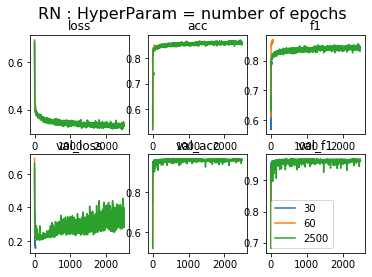

In [5]:
ho = np.array(history_obj)
ho = ho.transpose(1,2,0)

leg = [str(i) for i in epochs_range]                                                                                                                                                
                                                                                                                                       
titre = "RN : HyperParam = number of epochs"                                                                                                                                          

plot_perf(ho, leg, titre ,sub_title)

Nous remarquons que les performances (accuracy et f1_score) tendent vers les mêmes taux qu'il y ait 30, 60 ou 5000 itérations. En revanche nous remarquons qu'à partir de 1000 itérations, le val_loss augmente. Ceci illustre le surapprentissage. Le nombre optimal d'itération se situe donc autour de 60.

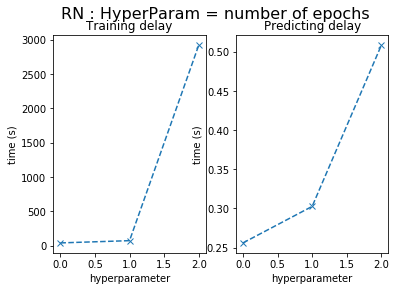

In [6]:
plot_delay(training_delay_RN,predicting_delay_RN,titre)


Notons ici que le temps d'apprentissage et de prédiction croissent avec le nombre d'itération.

## Question 5

Finalement, concernant la classification MLP, nous voyons qu'il faut trouver le bon compromis entre le nombre de couches, le nombre de perceptrons et le learning rate.   


| Hyperparamètre        | Nombre d'epochs |Couches Cachées          | Valeur Accuracy (val_acc) | Valeur f1_score (val_f1) | Valeur de perte (val_loss) | 
|-----------------------|-----------------|------------------------|-----------------|-----------------|------|
| Nombre de perceptrons | 60              |[5,4,4]                 |0.9411           |0,9478           |0.1966|
| Nombre de perceptrons | 60              |[100,100,2]             |0.9550           |0.9571           |0.2044|
| Nombre de perceptrons | 60              |[500,500,500]           |0.9634           |0.9662           |0.1109|
|-----------------------|-----------------|------------------------|-----------------|-----------------|------|
| Nombre de couches     | 60              |[100]                   |0.9634           |0.9631           |0.0987|
| Nombre de couches     | 60              |[100,100,2]             |0.9619           |0.9627           |0.1445|
| Nombre de couches     | 60              |[100,100,100,100,100,2] |0.9419           |0.9417           |0.2213|
|-----------------------|-----------------|------------------------|-----------------|-----------------|------|
| Learning rate (1e-5)  | 60              |[100,100,2]             |0.8553           |0.8594           |0.5234|
| Learning rate (0.0005)| 60              |[100,100,2]             |0.9600           |0.9604           |0.2085|
| Learning rate (0.01)  | 60              |[100,100,2]             |0.5191           |0.6815           |0.6926|
|-----------------------|-----------------|------------------------|-----------------|-----------------|------|
| Nombre d'epochs       | 30              |[100,100,2]             |0.9603           |0.9613           |0.1709|
| Nombre d'epochs       | 60              |[100,100,2]             |0.9584           |0.9598           |0.2056|
| Nombre d'epochs       | 2500            |[100,100,2]             |0.9628           |0.9638           |0.2824|  


- La meilleure solution pour le nombre de perceptrons par couche cachée est [500,500,500] en terme performance. Néanmoins il est préférable de choisir la solution [100,100,2] qui apporte de meilleures performance temporelles.  
- Le nombre de couche cachée apportant le meilleur compromis est de 3 ([100,100,2]).   
- Le learning rate apportant les meilleurs résultat est : 0.0005.
- Ici nous voyons que 2500 itérations apporte les meilleurs performances, nénanmoins elle apporte du sur apprentissage. De plus, le temps de traitement et d'apprentissage est plus long. Le meilleur compromis est donc de 60 itérations.   

En résumé, la meilleure solution pour le réseau MLP est :  
couche [100,100,2],  
learning rate de 0.0005,  
60 epochs.


## Question 6

L'objectif de la méthode SVM est donc de déterminer des hyperplans séparant les classes avec une marge maximale lorsque les ensembles sont linéairement séparables.
Le paramètre C est un facteur qui permet de pénaliser les points qui sont présents dans la marge. Si le point est présent dans la marge mais dont la prédiction est correcte, on peut affecter un poids entre 0 et 1. Dans notre cas, la meilleure performance est quand le paramètre C vaut 10. Cela veut dire que l'on pénalise très fortement les points dont la prédiction est mauvaise.
Par ailleurs, le paramètre gamma permet de déterminer la taille du noyau lorsque les ensembles ne sont pas linéairement séparables. Il faut néanmoins évaluer ce paramètre avec minutie, car il peut être source de sur apprentissage (quand la valeur de gamma est faible) ou de sous apprentissage (gamma élevé).

Pour l'étude de nos deux classificateurs, nous avons utilisé la même de machine dont les performances sont les suivantes :

Memoire : 15.5GB  
Processor : IntelCore i7-8700 CPU @ 3.2GHz x 12  
Graphics : Titan Xp/PCle/SSE2  
GNOME : 3.28.2  
OS type : 64bit  


In [3]:

X_grid,Y_grid = get_data_GridSearch()
Grid=GridSearch_bestparam(X_grid,Y_grid)



ca commence
best param
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
best score
0.967375


En utilisant l'outil "grid_search" nous obtenons une combinaison des meilleurs paramètres ci-dessus. Nous obtenons dans ce cas une accuracy de plus de 96%.

Analyse Linear


/home/ens/AN03460/venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/home/ens/AN03460/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/ens/AN03460/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/ens/AN03460/venv/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/ens/AN03460/venv/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: get_value is deprecated and will be removed in a future release. Please 

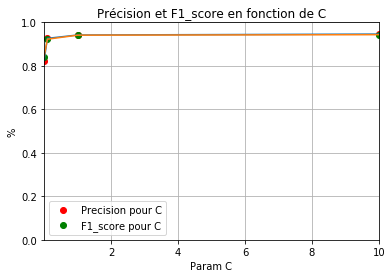

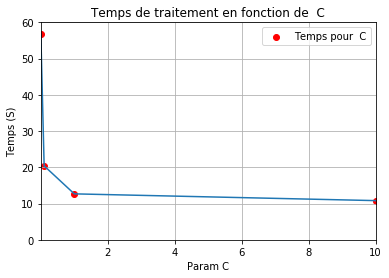

In [21]:
print ('Analyse Linear')

plot_Linear_acc(Grid)



Nous remarquons que l'on obtient rapidement tes performances très statisfaisantes. Par ailleurs, notons que le temps de traitement décroit avec l'augmentation du paramètre C.

Analyse RBF


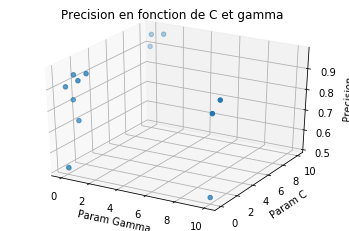

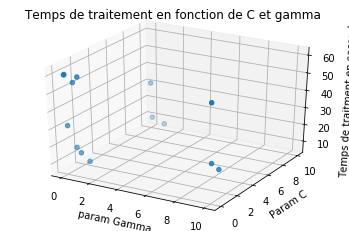

In [7]:
print('Analyse RBF')
plot_RBF_acc(Grid)

In [25]:
print('Table de valeur')

result = Grid.cv_results_
df = pd.DataFrame(data=result)
dfData=df[['param_kernel','param_C','param_gamma','rank_test_Accuracy','mean_test_Accuracy','std_test_Accuracy', 'mean_test_F1','std_test_F1','mean_fit_time', 'std_fit_time','mean_score_time', 'std_score_time']]
dfData= dfData.sort_values(['param_kernel','rank_test_Accuracy','mean_test_F1'],ascending=[True,True,True])
dfData



Table de valeur


param_kernel param_C param_gamma  rank_test_Accuracy  mean_test_Accuracy  \
3        linear      10         NaN                   7            0.946063   
2        linear       1         NaN                   9            0.941813   
1        linear     0.1         NaN                  10            0.926500   
0        linear   0.001         NaN                  15            0.823063   
18          rbf      10           1                   1            0.967375   
14          rbf       1           1                   2            0.961375   
17          rbf      10         0.1                   3            0.956250   
15          rbf       1          10                   4            0.952063   
19          rbf      10          10                   5            0.951875   
10          rbf     0.1           1                   6            0.947688   
13          rbf       1         0.1                   8            0.945187   
11          rbf     0.1          10                  11            0.911062   
9           rbf     0.1         0.1                  12            0.908438   
16          rbf      10       0.001                  13            0.896813   
12          rbf       1       0.001                  14            0.827000   
6           rbf   0.001           1                  16            0.763563   
4           rbf   0.001       0.001                  17            0.519188   
5           rbf   0.001         0.1                  17            0.519188   
7           rbf   0.001          10                  17            0.519188   
8           rbf     0.1       0.001                  17            0.519188   

    std_test_Accuracy  mean_test_F1  std_test_F1  mean_fit_time  std_fit_time  \
3            0.003021      0.947985     0.003004      10.812186      0.912470   
2            0.003174      0.943939     0.003059      12.676310      0.228588   
1            0.005323      0.929168     0.005085      20.398949      0.679764   
0            0.006238      0.844318     0.005067      56.841637      0.364709   
18           0.002112      0.968615     0.002072       7.057173      0.464026   
14           0.001941      0.962855     0.001872       9.614222      0.311527   
17           0.003422      0.957844     0.003256       9.733783      0.502281   
15           0.002334      0.954683     0.002185      20.209869      0.217480   
19           0.002351      0.954324     0.002220      12.342011      1.218828   
10           0.004742      0.949900     0.004345      17.304033      0.560825   
13           0.005501      0.947112     0.005200      16.423818      0.582909   
11           0.005057      0.919397     0.004303      26.250061      0.165005   
9            0.007772      0.911779     0.007275      31.606892      0.954140   
16           0.005141      0.900781     0.004552      30.477180      0.304203   
12           0.006142      0.828766     0.006334      53.377109      0.618891   
6            0.001182      0.811331     0.000872      60.407225      1.051235   
4            0.000063      0.683507     0.000054      59.869992      1.209002   
5            0.000063      0.683507     0.000054      60.479505      1.244972   
7            0.000063      0.683507     0.000054      59.836619      0.353329   
8            0.000063      0.683507     0.000054      59.874684      0.810027   

    mean_score_time  std_score_time  
3          1.693979        0.159801  
2          2.336374        0.082925  
1          4.614898        0.334103  
0         12.590611        0.896276  
18         1.381827        0.136445  
14         2.176467        0.149358  
17         2.087624        0.116255  
15         4.897746        0.334222  
19         2.993964        0.296574  
10         3.993368        0.169731  
13         3.634397        0.116167  
11         7.314962        0.197853  
9          7.834986        0.449831  
16         8.052330        0.389286  
12        14.409290        0.394985  
6         16.301724        0.4575

In [12]:
print('Résultat de linear avec hyperparametre')
SVCLine(X_train, Y_train, X_test, Y_test,10)

Résultat de linear avec hyperparametre
[[1442   97]
 [  85 1576]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1539
           1       0.94      0.95      0.95      1661

    accuracy                           0.94      3200
   macro avg       0.94      0.94      0.94      3200
weighted avg       0.94      0.94      0.94      3200



In [11]:
print('Résultat de rbf avec hyperparametre')
SVC_rbf(X_train, Y_train, X_test, Y_test,10,1)




Résultat de rbf avec hyperparametre
[[1486   53]
 [  40 1621]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1539
           1       0.97      0.98      0.97      1661

    accuracy                           0.97      3200
   macro avg       0.97      0.97      0.97      3200
weighted avg       0.97      0.97      0.97      3200



## Question 7

Dans le cas du MLP, on remarque que pour 1600 images, le temps d'apprentissage se situe autour de 5 secondes. Pour 16000, le temps d'apprentissage est d'environ 32 secondes. Le temps d'apprentissage est donc bien réduit tandis que le temps de prédiction et les performances ne diminuent pas considérablement avec la taille du dataset d'entrainement.

Dans le cas de SVM, nous avons étudié la double influence des paramètres gamma et C sur le temps d'apprentissage. On remarque alors que ce temps de traitement est le plus élevé dans le cas où les valeurs de C et gamma sont faibles. C'est à dire quand on ne pénalise pas trop les mauvais points et que la taille du noyau est faible, que l'on tend donc vers une situation de sur apprentissage. 

Globalement, les temps d'apprentissages et de prédiction sont du même ordre de grandeur bien que le temps d'apprentissage MLP soit plus faible que celui de SVM qui nécessite plus de calculs (noyau ou transformation non linéaire par exemple). 

## Question 8

Du point de vue des performances, il semblerait que le SVM avec noyau rbf soit le plus adapté avec des performances avoisinant les 97%. En revanche, le temps de traitement est quant à lui beaucoup plus élevé. Dans le cas de classification des galaxies, il n'est pas gênant d'avoir un long temps de traitement.

## Question 9

L'idéal serait de mener une étude plus précise des hyperparamètres pour trouver une solution optimale.
Par ailleurs, il faudrait utiliser des méthodes de validation telle que 5-fold cross validation pour la méthode MLP par exemple. Ceci nous aurait permis d'avoir un meilleur support de comparaison de performance. Par ailleurs, nous avons utilisé l'optimisation Adam qui nous procurait de meilleurs résultats. On pourrait toutefois étudier plus en détail la méthode de descente de gradient à laquelle il faudrait coupler l'étude du pas de descente de gradient.

## Conlusion

Ce troisième laboratoire nous a permis de comprendre davantage le fonctionnement de deux nouvelles méthodes de classification : SVM et MLP. Dans les deux cas, les temps d'apprentissage sont bien plus longs que les premiers laboratoires.  
Dans le cas de MLP nous obtenons des performances qui s'approchent de 95% avec un temps de traitement de l'ordre de la minute. SVM nous apporte de meilleures performances (96%) avec un temps de prédiction similaire, mais un temps d'apprentissage beaucoup plus long. 
Finalement, dans le cas de notre étude le classificateur le plus adapté est donc SVM avec les paramètres étudiés dans la recherche des meilleurs paramètres.
Comme mentionné précédemment, il pourrait être intéressant de tester le modèle MLP avec une validation croisée pour pouvoir comparer au mieux les 2 modèles.